Global Power Plant Database
Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database
The database includes the following indicators:
•	
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
•	`country_long` (text): longer form of the country designation
•	`name` (text): name or title of the power plant, generally in Romanized form
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
•	`capacity_mw` (number): electrical generating capacity in megawatts
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`primary_fuel` (text): energy source used in primary electricity generation or export
•	`other_fuel1` (text): energy source used in electricity generation or export
•	`other_fuel2` (text): energy source used in electricity generation or export
•	`other_fuel3` (text): energy source used in electricity generation or export
•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
•	`url` (text): web document corresponding to the `source` field
•	`geolocation_source` (text): attribution for geolocation information
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
•	`year_of_capacity_data` (number): year the capacity information was reported
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
•	`generation_data_source` (text): attribution for the reported generation information
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Dataset Link-
•	https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv




Importing of Libraries

# Power project as Regression problem

In [1731]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.preprocessing import power_transform
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats.mstats import normaltest
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics  import roc_auc_score
from sklearn.metrics import r2_score
from scipy.stats.mstats import normaltest
import warnings
warnings.filterwarnings('ignore')

Extracting the Data

In [1732]:
Power=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
Power


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataframe have 27 columns and 907 rows. 12 columns have object and 15 float data type. Null values are also present in the dataset.
The input contains boths label and target variable.
In task 1, "Average Price" is the target variable which contains continuous data, so it is a regression type problem.
In task 2, "Region" is the target variable which has classes, so it is a classification problem.


In [1733]:
Power.shape

(907, 27)

 we can see that  we have 907 rows and  27 columns ie attributes and when we check the shape its showing 27 which mean one column is target and it is 'capacity_mw'

In [1734]:
Power.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [1735]:
Power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

All the above 26 columns have  Null and non null  values and out of 26 attributes or input columns we have only 1 columns as output and and rest all are 26 columns are int -00,object-12 and Float=15. and object has to be changed using Ordinal encoder

In [1736]:
Power.columns = Power.columns.str.replace(' ', '_')
Power.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [1737]:
Power.isnull().sum()     #no Missing Values

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

1)other_fuel3, wepp_id and estimated_generation_gwh,generation_gwh_2013,generation_gwh_2019,  has all NaN values  NaN has no meaning can drop these 3 columns.
2)other_fuel2 has only one non null value can be dropped

In [1738]:
Power

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1739]:
Power.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Now Lets Drop 1)other_fuel3, wepp_id and estimated_generation_gwh,generation_gwh_2013,generation_gwh_2019,  has all NaN values  NaN has no meaning can drop these 3 columns.other_fuel2 has only one non null value can be dropped
country, country_long, year_of_capacity_data and generation_data_source has only one unique count,other_fuel1 has 3 values which means all the values of the column are same we can drop.
Droping unnecessary columns

In [1740]:

Power.drop(['name','gppd_idnr','url','owner','other_fuel1','other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh','generation_gwh_2013','generation_gwh_2019','country','country_long','year_of_capacity_data','generation_data_source'],axis=1,inplace=True)
Power

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


In [1741]:
#dropping duplicate rows and resetting index
Power=Power.drop_duplicates()
print('Number of rows after removing duplicates=', len(Power))

Number of rows after removing duplicates= 906


<AxesSubplot:>

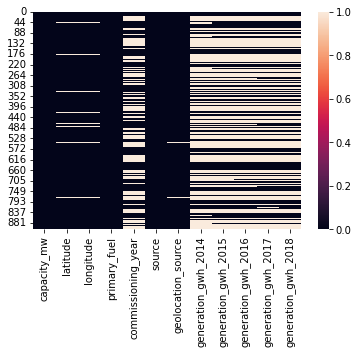

In [1742]:
sns.heatmap(Power.isnull())

In [1743]:
Power.duplicated().sum()# No Duplicate Values

0

In [1744]:
Power.isnull().sum()

capacity_mw              0
latitude                45
longitude               45
primary_fuel             0
commissioning_year     379
source                   0
geolocation_source      18
generation_gwh_2014    508
generation_gwh_2015    484
generation_gwh_2016    472
generation_gwh_2017    466
generation_gwh_2018    458
dtype: int64

In [1745]:
#Replacing NaN values in numerical columns
Power["latitude"] = Power["latitude"].fillna(Power["latitude"].median())
Power["longitude"] = Power["longitude"].fillna(Power["longitude"].median())
Power["geolocation_source"] = Power["geolocation_source"].fillna(Power["geolocation_source"].mode()[0])
Power["commissioning_year"] = Power["commissioning_year"].fillna(Power["commissioning_year"].median())
Power["generation_gwh_2014"] = Power["generation_gwh_2014"].fillna(Power["generation_gwh_2014"].median())
Power["generation_gwh_2015"] = Power["generation_gwh_2015"].fillna(Power["generation_gwh_2015"].median())
Power["generation_gwh_2016"] = Power["generation_gwh_2016"].fillna(Power["generation_gwh_2016"].median())
Power["generation_gwh_2017"] = Power["generation_gwh_2017"].fillna(Power["generation_gwh_2017"].median())
Power["generation_gwh_2018"] = Power["generation_gwh_2018"].fillna(Power["generation_gwh_2018"].median())

#filling nan Values in latitude', 'longitude', 'geolocation_source',, 'generation_gwh_2014', 'generation_gwh_2015',generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       ',
       '

In [1746]:
Power

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,Coal,2001.0,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,Wind,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,2001.0,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,Wind,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,Coal,2001.0,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375


In [1747]:
Power.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

Finally no null values are present

In [1748]:
#Frequency of 'capacity_mw'
Power['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

<AxesSubplot:xlabel='capacity_mw', ylabel='count'>

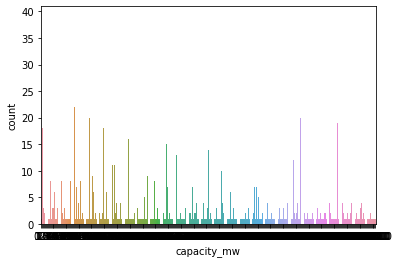

In [1749]:
# Plotting the 'capacity_mw' frequency
sns.countplot(data=Power,x='capacity_mw')

In [1750]:
#Normalizing the frequency table of 'AveragePrice' variable
Power['capacity_mw'].value_counts(normalize=True)

5.0       0.043046
10.0      0.024283
600.0     0.022075
15.0      0.022075
1200.0    0.020971
            ...   
291.0     0.001104
645.0     0.001104
41.4      0.001104
17.5      0.001104
106.6     0.001104
Name: capacity_mw, Length: 361, dtype: float64

In [1751]:
#Frequency table
Power['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

# EDA

Encoding Techniques

In [1752]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in Power.columns:
    if Power[i].dtypes=='object':
        Power[i]=enc.fit_transform(Power[i].values.reshape(-1,1))
Power

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6.0,2011.0,109.0,1.0,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1.0,2001.0,174.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7.0,2001.0,21.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2.0,2004.0,22.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1.0,2015.0,22.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1.0,2016.0,22.0,2.0,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6.0,2001.0,77.0,0.0,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,7.0,2001.0,21.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,1.0,2001.0,59.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375


by using encoding techniques we have converted into float  from Object  

In [1753]:
Power.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel           float64
commissioning_year     float64
source                 float64
geolocation_source     float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

So here we can see that our 'capacity_mw ' is in float format ,and by this we can make the decision that we have to build a Regression Model. . 

Visualization using Count and Bar Plot for Input and output Variables

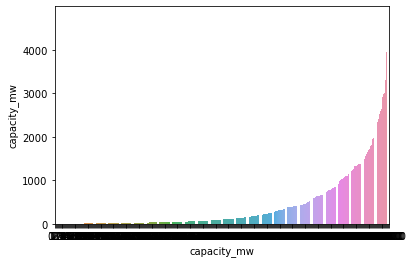

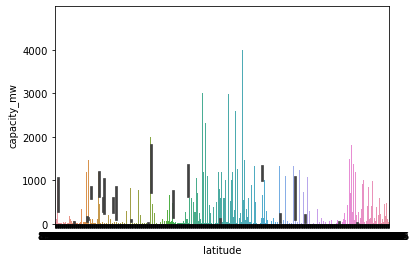

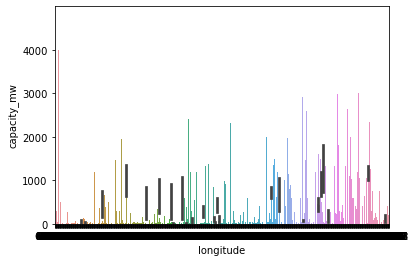

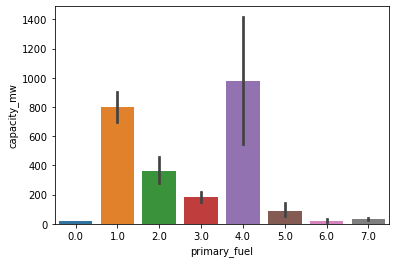

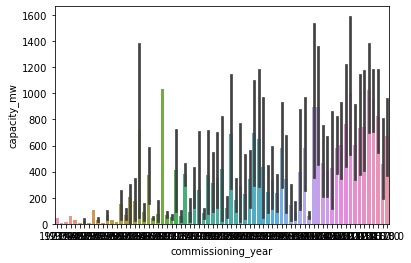

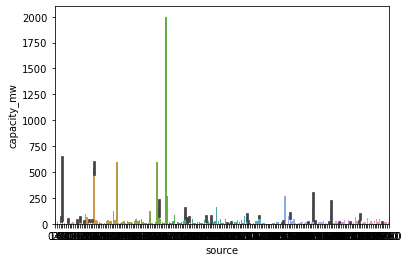

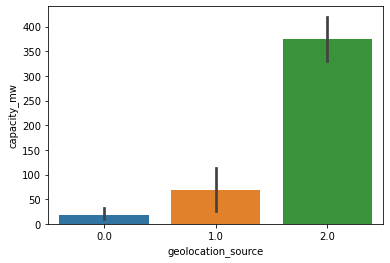

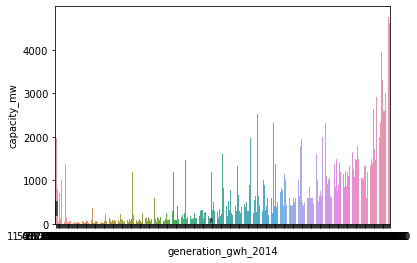

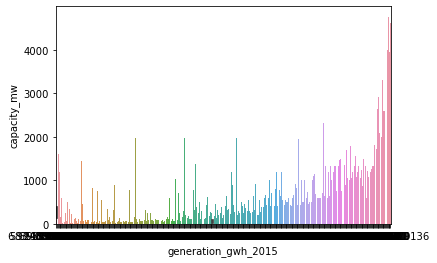

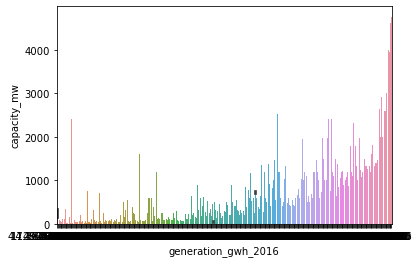

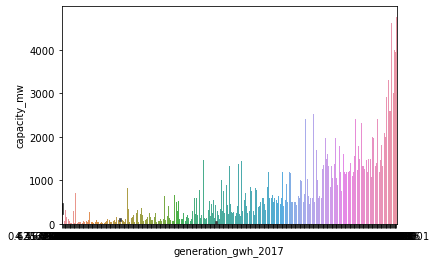

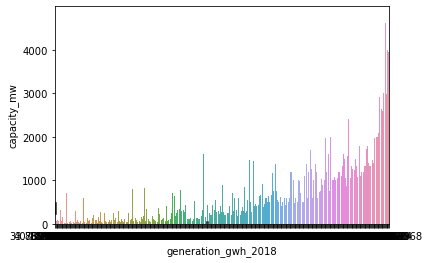

In [1754]:
for column in Power.columns:
    sns.barplot(x=column,y='capacity_mw',data=Power)
    plt.xlabel(column)
    plt.show()


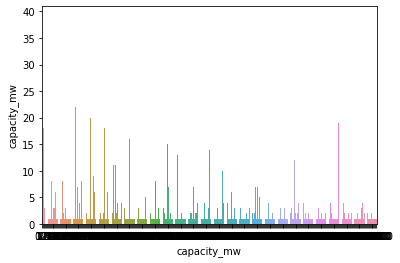

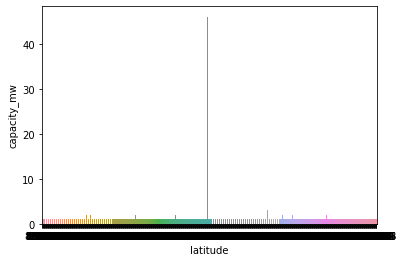

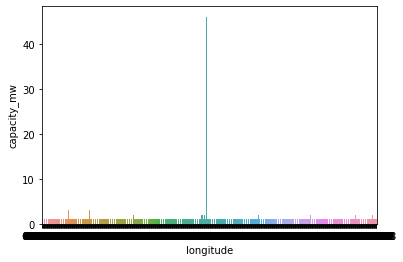

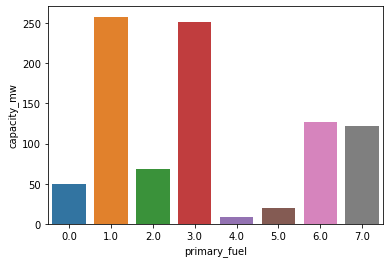

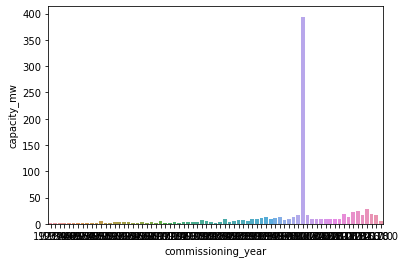

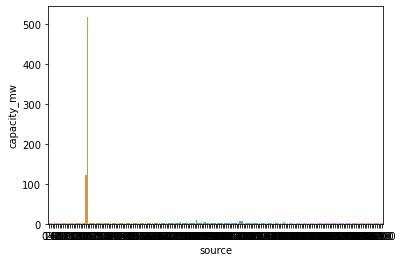

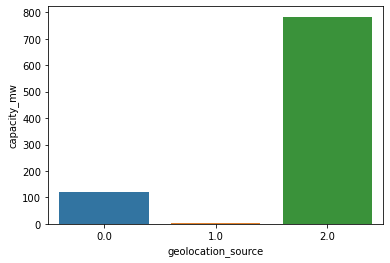

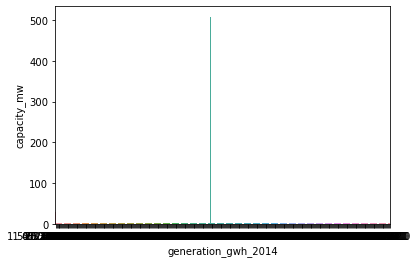

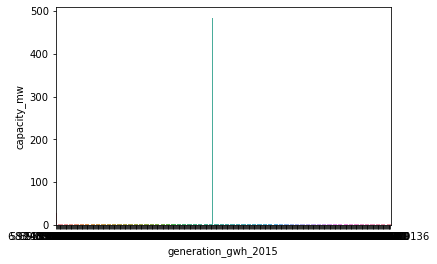

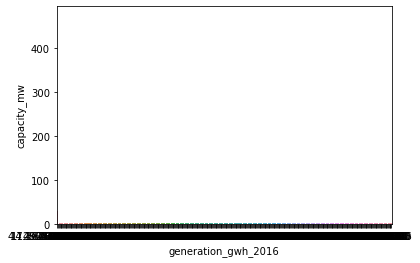

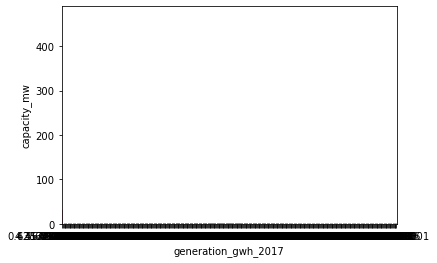

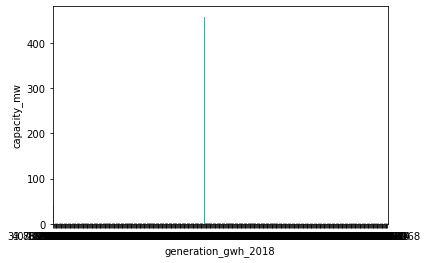

In [1755]:
for column in Power.columns:
    sns.countplot(x=column, data=Power)
    plt.xlabel(column)
    plt.ylabel('capacity_mw')
    plt.show()

Following observations are made
the maximum attribution of geolocation information is from WRI geolocation source and least is from National Renewable laboratory
The maximum megawatt of electricity can be produced by Nuclear followed by Coal and the least is Biomass ,solar and wind
maximum genration of electricity is through Nuclear followed by Coal and the least is by Oil in 2014 
The Primary fuel Solar has high latitude of above 20 followed by Hydro, Coal and Gas . Apart from these types others have less latitude
maximum genration of electricity is through Nuclear followed by Coal and the least is by Oil in 2015 
maximum genration of electricity is through Nuclear followed by Coal and the least is by Oil in 2016 .
maximum genration of electricity is through Nuclear followed by Coal and the least is by Oil in 2017 ..but Here we analyze also that the use of has been increased in 2017 and its almost near to Nuclear.
maximum genration of electricity is through Nuclear followed by Coal and the least is by Oil in 2017 ..but Here we analyze also that the use of Coal has been increased in 2018 and its almost near to Nuclear.

Histogram View 

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'primary_fuel'}>,
        <AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'source'}>],
       [<AxesSubplot:title={'center':'geolocation_source'}>,
        <AxesSubplot:title={'center':'generation_gwh_2014'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>,
        <AxesSubplot:title={'center':'generation_gwh_2018'}>]],
      dtype=object)

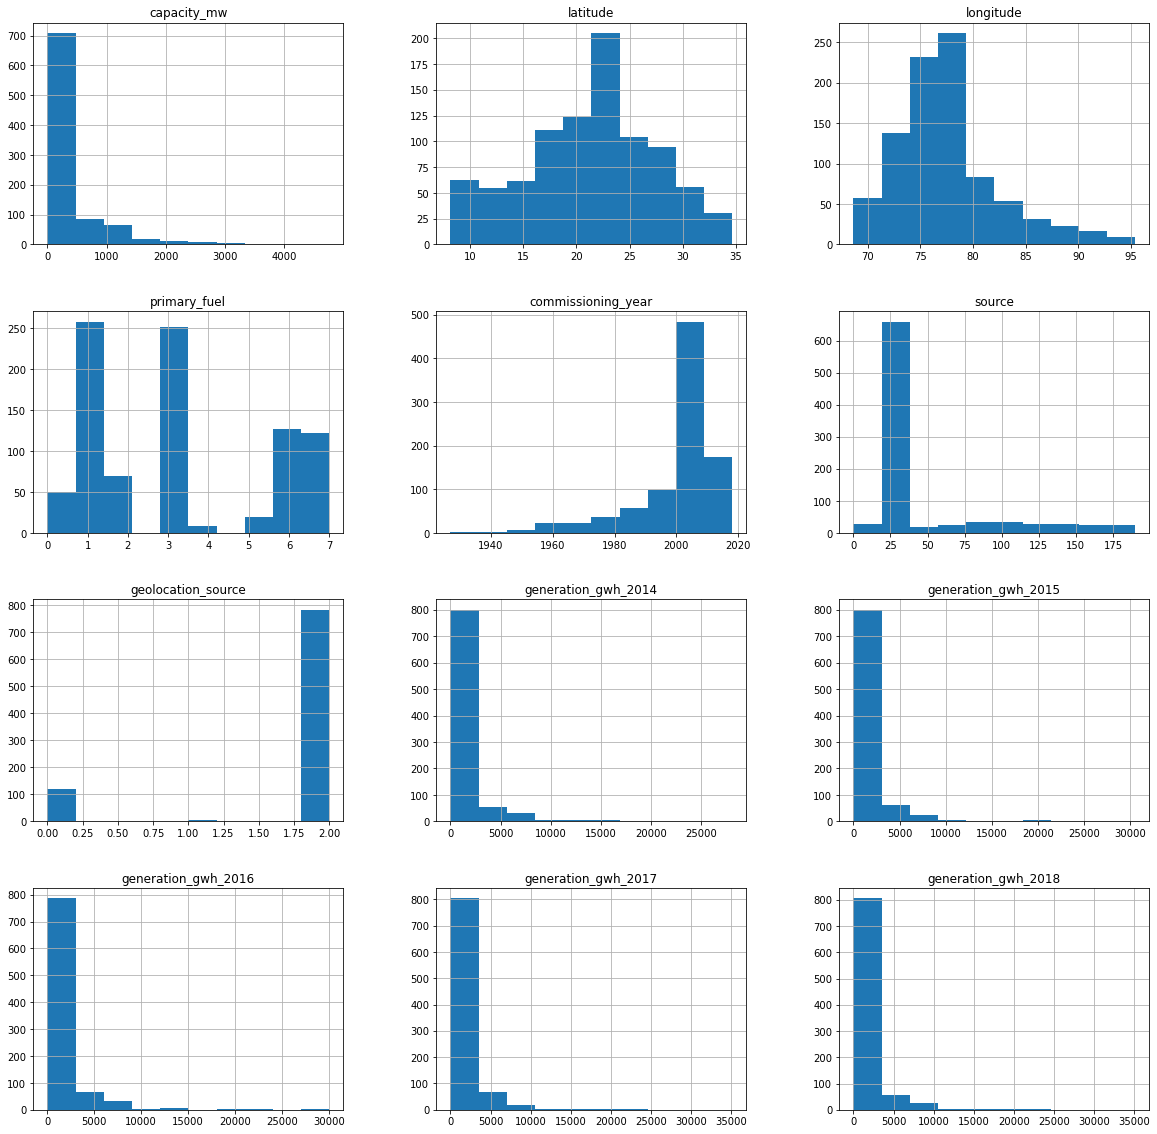

In [1756]:
Power.hist(bins=10, figsize=(20,20))

We can notice that lot of Skewness is present in the dataset(Right and Left both skewness is present) ,So we will reduce all this skewness later. Only latitude seem to have Normal Distribution..

# Bivarate

In [1758]:
Power.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

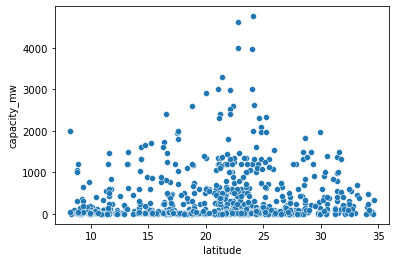

In [1759]:
sns.scatterplot(x='latitude',y='capacity_mw',data=Power)

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

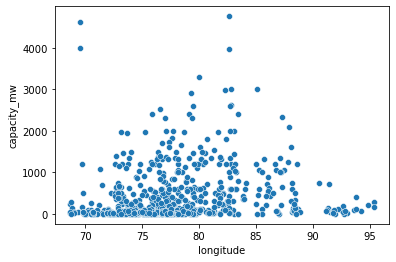

In [1760]:
sns.scatterplot(x='longitude',y='capacity_mw',data=Power)

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

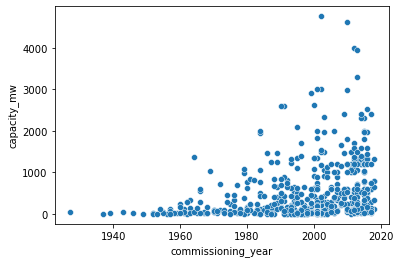

In [1761]:
sns.scatterplot(x='commissioning_year',y='capacity_mw',data=Power)

<AxesSubplot:xlabel='source', ylabel='capacity_mw'>

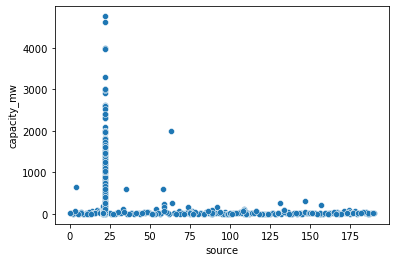

In [1762]:
sns.scatterplot(x='source',y='capacity_mw',data=Power)

<AxesSubplot:xlabel='geolocation_source', ylabel='capacity_mw'>

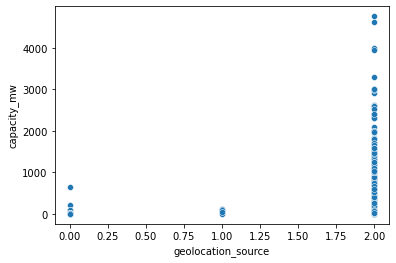

In [1763]:
sns.scatterplot(x='geolocation_source',y='capacity_mw',data=Power)

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='capacity_mw'>

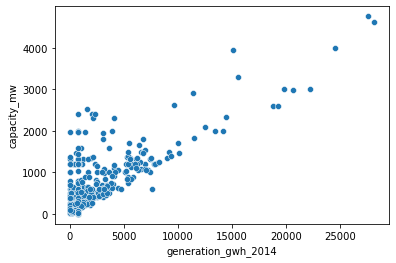

In [1764]:
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',data=Power)

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='capacity_mw'>

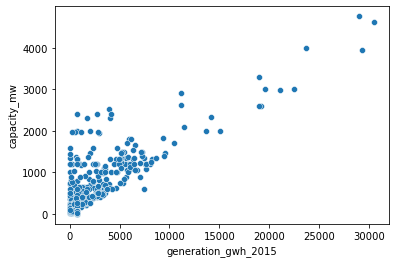

In [1765]:
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',data=Power)

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='capacity_mw'>

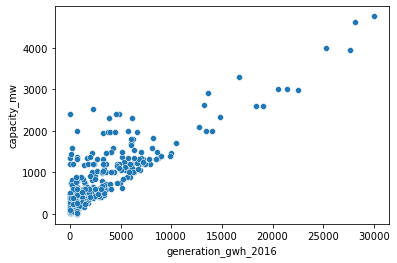

In [1766]:
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',data=Power)

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

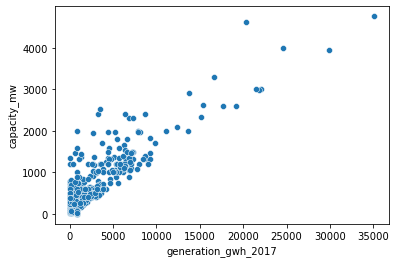

In [1767]:
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',data=Power)

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='capacity_mw'>

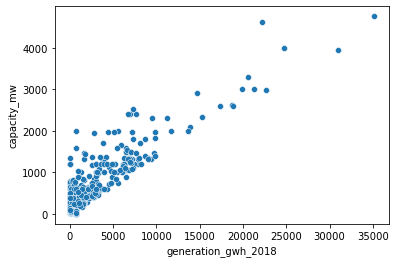

In [1768]:
sns.scatterplot(x='generation_gwh_2018',y='capacity_mw',data=Power)

 We can see that at latitude 16 to 28 capacity of magawatt seem to be the highest
 We can see that at longitude 75 to 83 capacity of magawatt seem to be the highest
 We can see that in case of other fuel -Oil has the maximum capacity of producing electricity in megawatt and the least is congenration
Maximum meghawatt is produced by WRI
Max electricity generation in 2014 was 28127.. average generation was 1516.. generation_gwh has linear relation with target variable capacity_mw
Max electricity generation in 2015 was 30539.. average generation was 1510.. generation_gwh2015 has linear relation with target variable capacity_mw
The Primary fuel Solar has high latitude of above 20 followed by Hydro, Coal and Gas . Apart from these types others have less latitude
 

Univariate Analysis

<AxesSubplot:xlabel='latitude', ylabel='Density'>

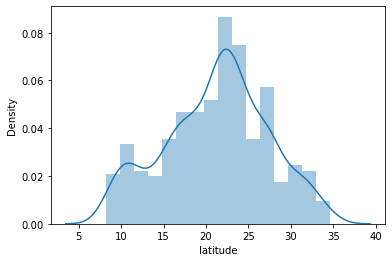

In [1769]:
sns.distplot(Power['latitude'])

<AxesSubplot:xlabel='longitude', ylabel='Density'>

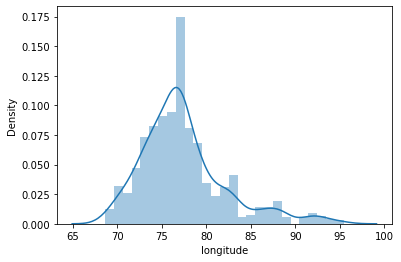

In [1770]:
sns.distplot(Power['longitude'])

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

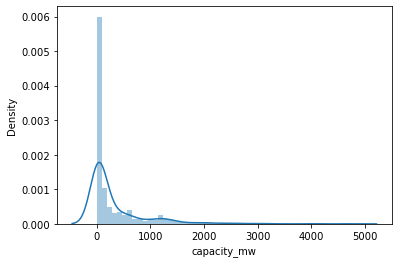

In [1771]:
sns.distplot(Power['capacity_mw'])

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

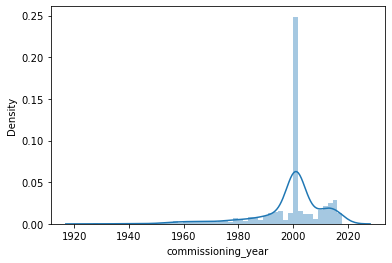

In [1772]:
sns.distplot(Power['commissioning_year'])

<AxesSubplot:xlabel='source', ylabel='Density'>

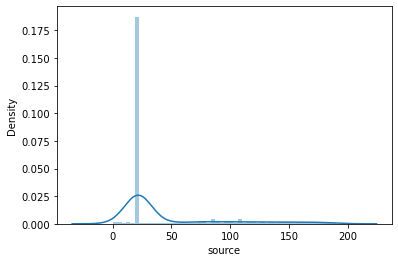

In [1773]:
sns.distplot(Power['source'])

<AxesSubplot:xlabel='geolocation_source', ylabel='Density'>

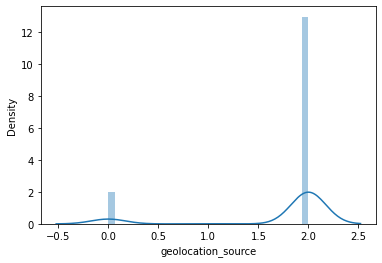

In [1774]:
sns.distplot(Power['geolocation_source'])

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

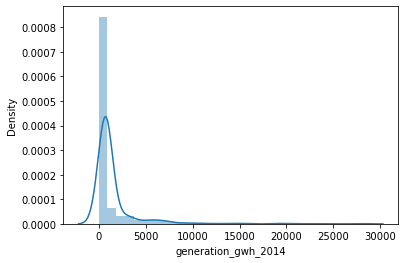

In [1775]:
sns.distplot(Power['generation_gwh_2014'])

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

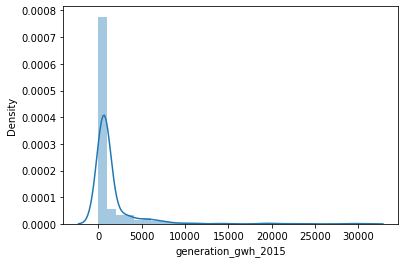

In [1776]:
sns.distplot(Power['generation_gwh_2015'])

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

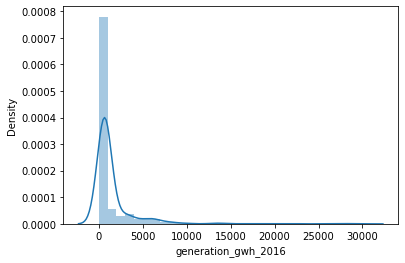

In [1777]:
sns.distplot(Power['generation_gwh_2016'])

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

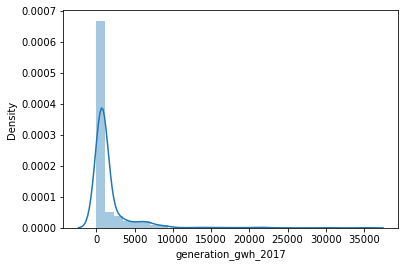

In [1778]:
sns.distplot(Power['generation_gwh_2017'])

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Density'>

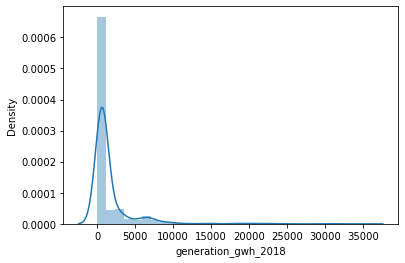

In [1779]:
sns.distplot(Power['generation_gwh_2018'])

Target variable is left skewed
latitude is also skewed
longitude is also skewed
Here we have maximum of coal and hydro primary_fuel and minimum of Nuclear and Oil primary_fuel
Other fuel1 used in power plant is maximum of Oil and least of Gas
commissing_year is skewed and sems like most of power plant commissing year was around 2000





the data of the column is normalised ...The building block is out of normalized curve..It a right skewed data..
Maximum columns are normally distributed but some columns  have skewness. . . .


Normal distribution curve of outcome column is irrelevent

Multivariate Analysis

<Figure size 1800x2160 with 0 Axes>

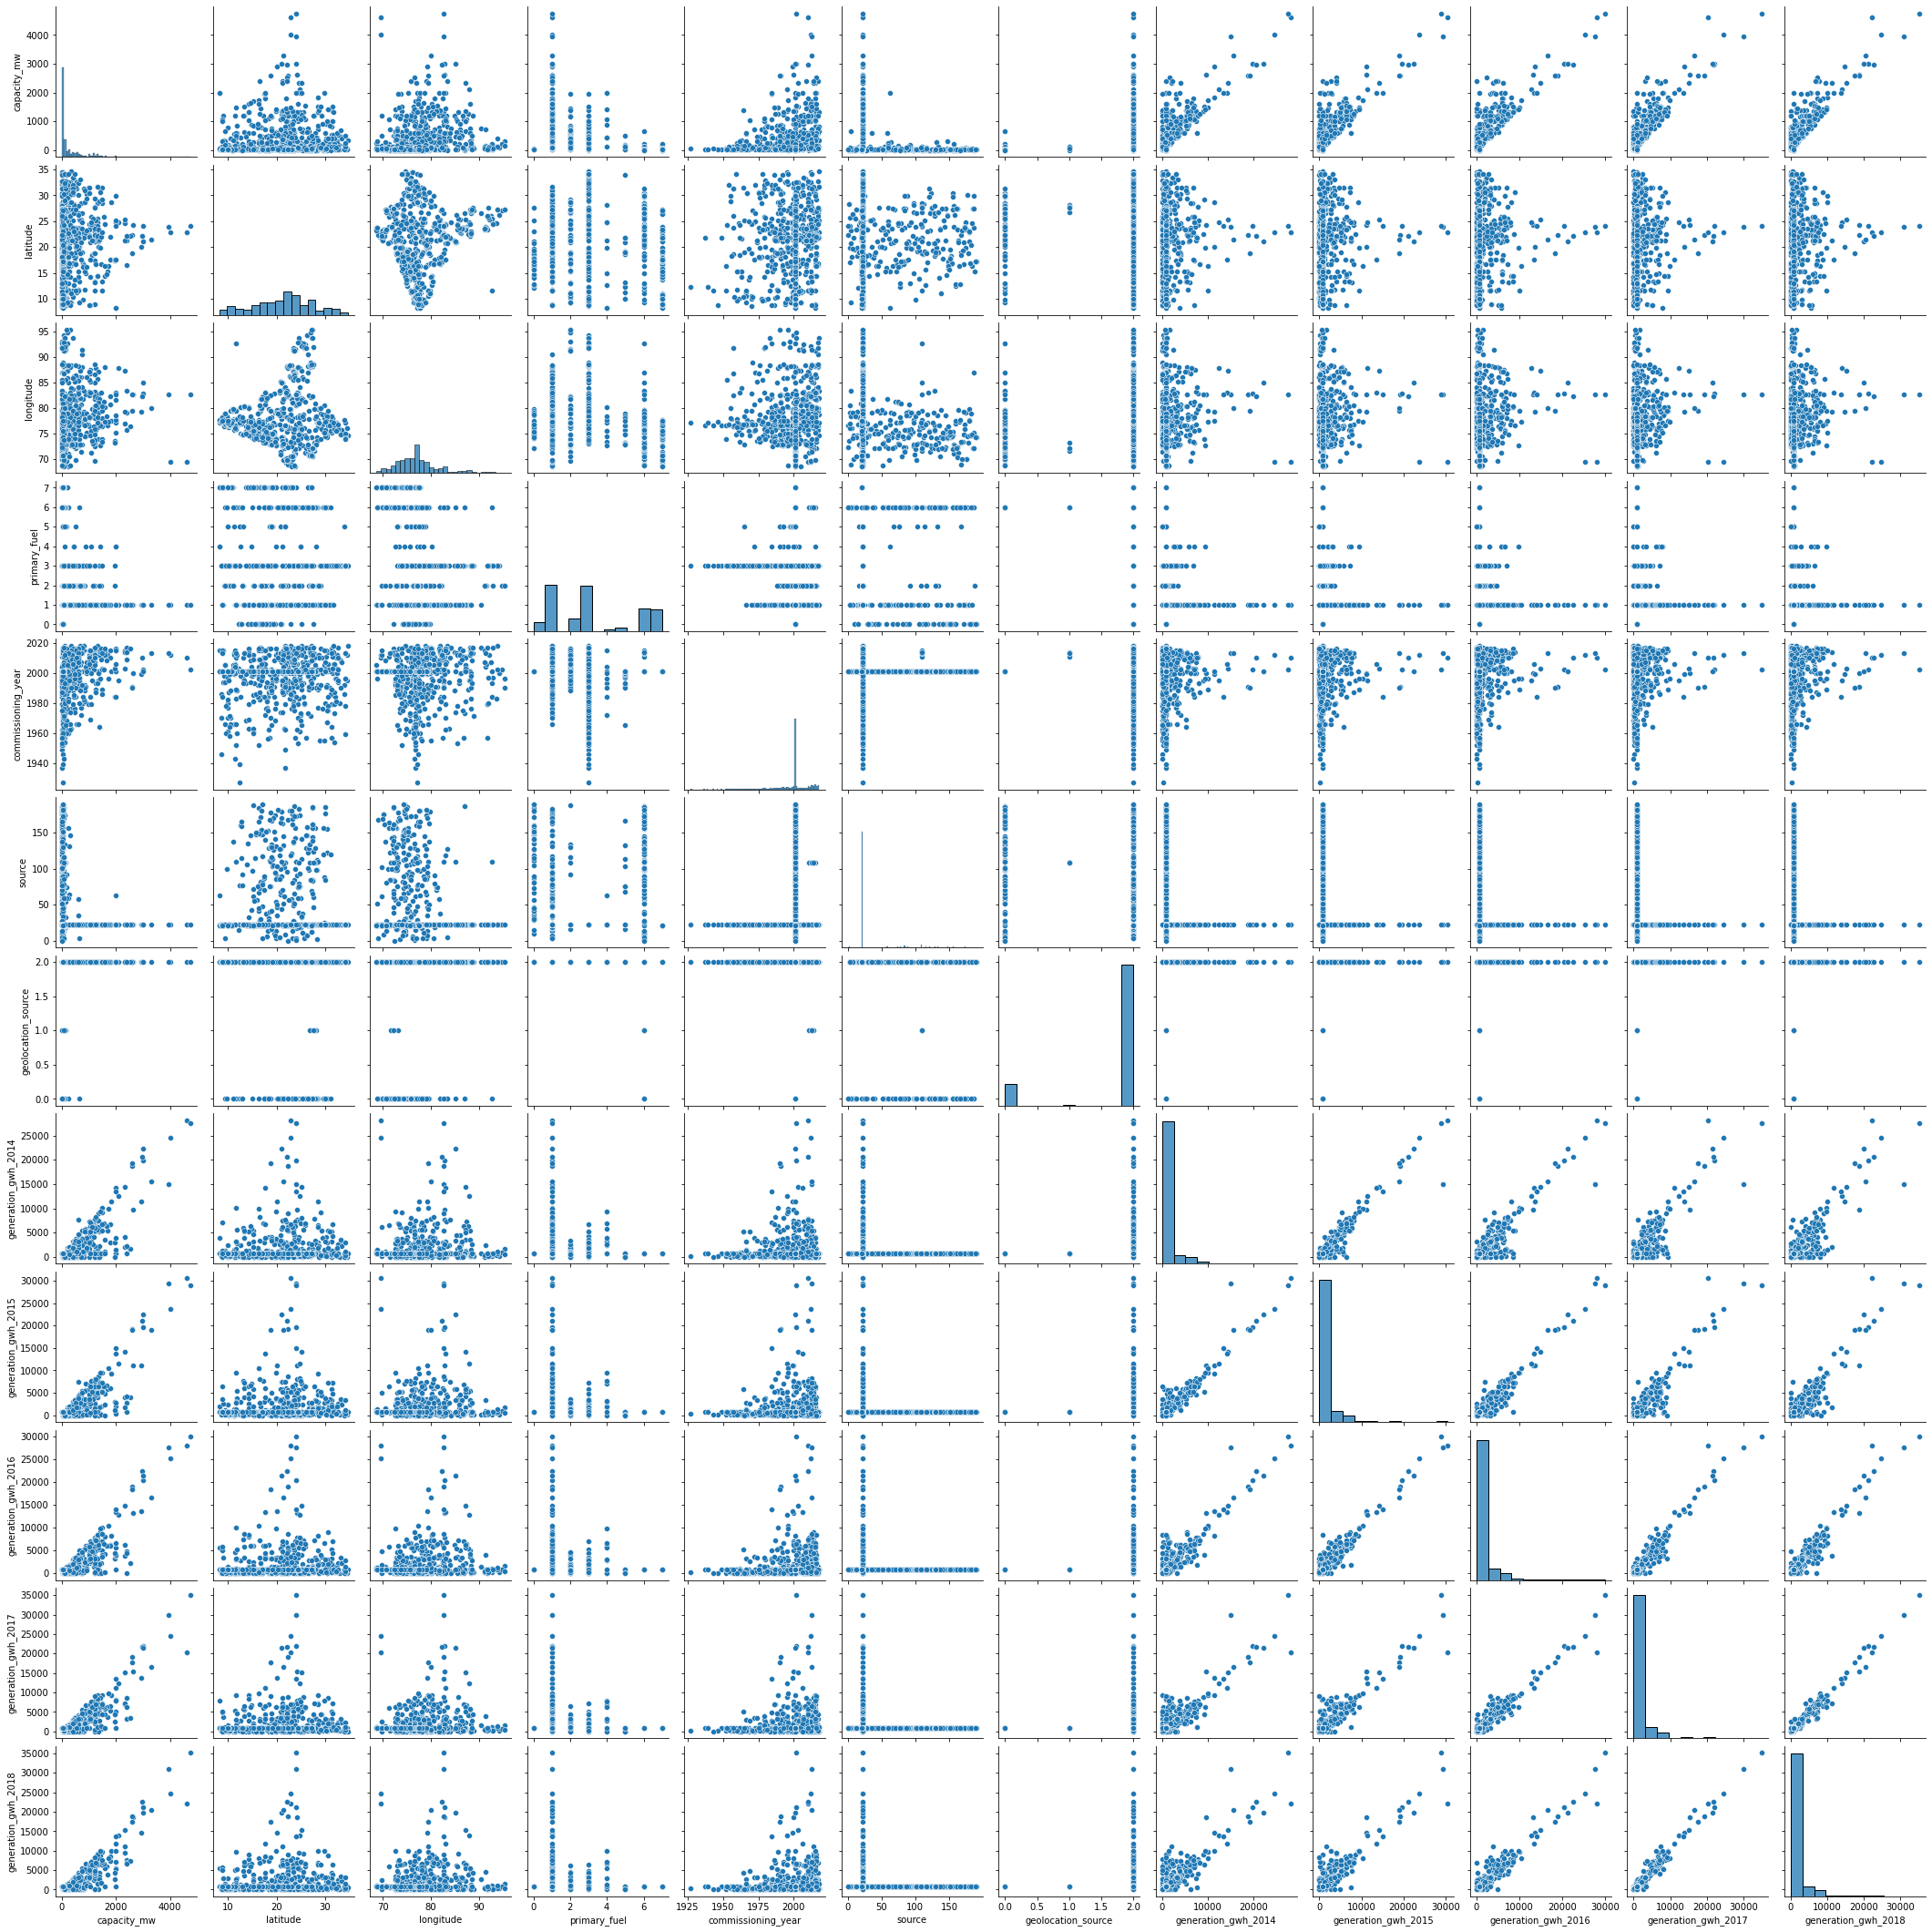

In [1780]:
plt.figure(figsize=(25,30))
sns.pairplot(Power)
plt.show()

pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "capacity_mw". Here we can observe the relation between the features and label.Most of the features have strong linear relationship and correlation with each other.

Now Lets See that counts of each columns

In [1781]:
for i in Power.columns:
        print(Power[i].value_counts())
        print('*'*100)

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64
****************************************************************************************************
21.7800    46
24.1917     3
19.0004     3
31.2680     2
11.7696     2
           ..
22.7554     1
27.1598     1
17.2970     1
20.8772     1
9.9344      1
Name: latitude, Length: 836, dtype: int64
****************************************************************************************************
76.7195    46
71.6917     4
75.8988     3
72.8983     3
71.6918     3
           ..
74.2393     1
77.0435     1
73.8254     1
74.3916     1
77.4768     1
Name: longitude, Length: 827, dtype: int64
****************************************************************************************************
1.0    258
3.0    251
6.0    127
7.0    122
2.0     69
0.0     50
5.0     20
4.0      9
Name: primary_fuel, dtype: i

Corelation with Target

<AxesSubplot:>

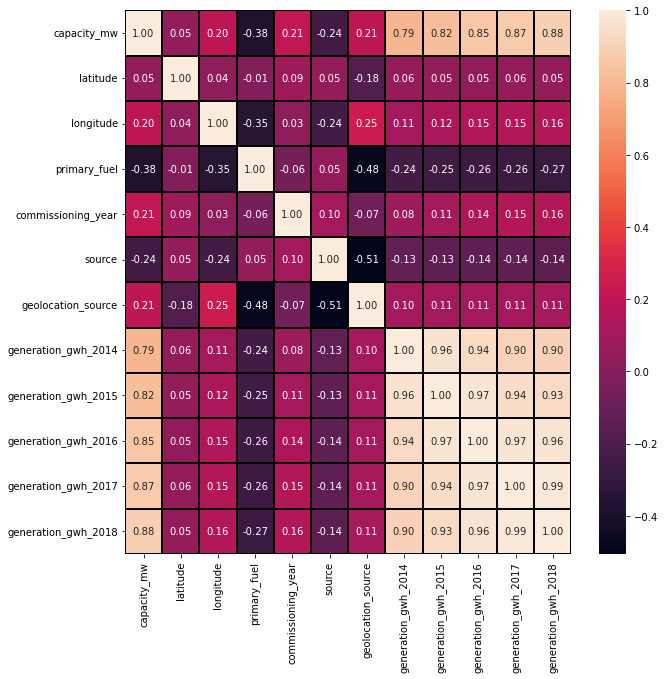

In [1782]:
plt.figure(figsize = (10,10))
sns.heatmap(Power.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label. This heat mapcontains both positive and negative correlation.

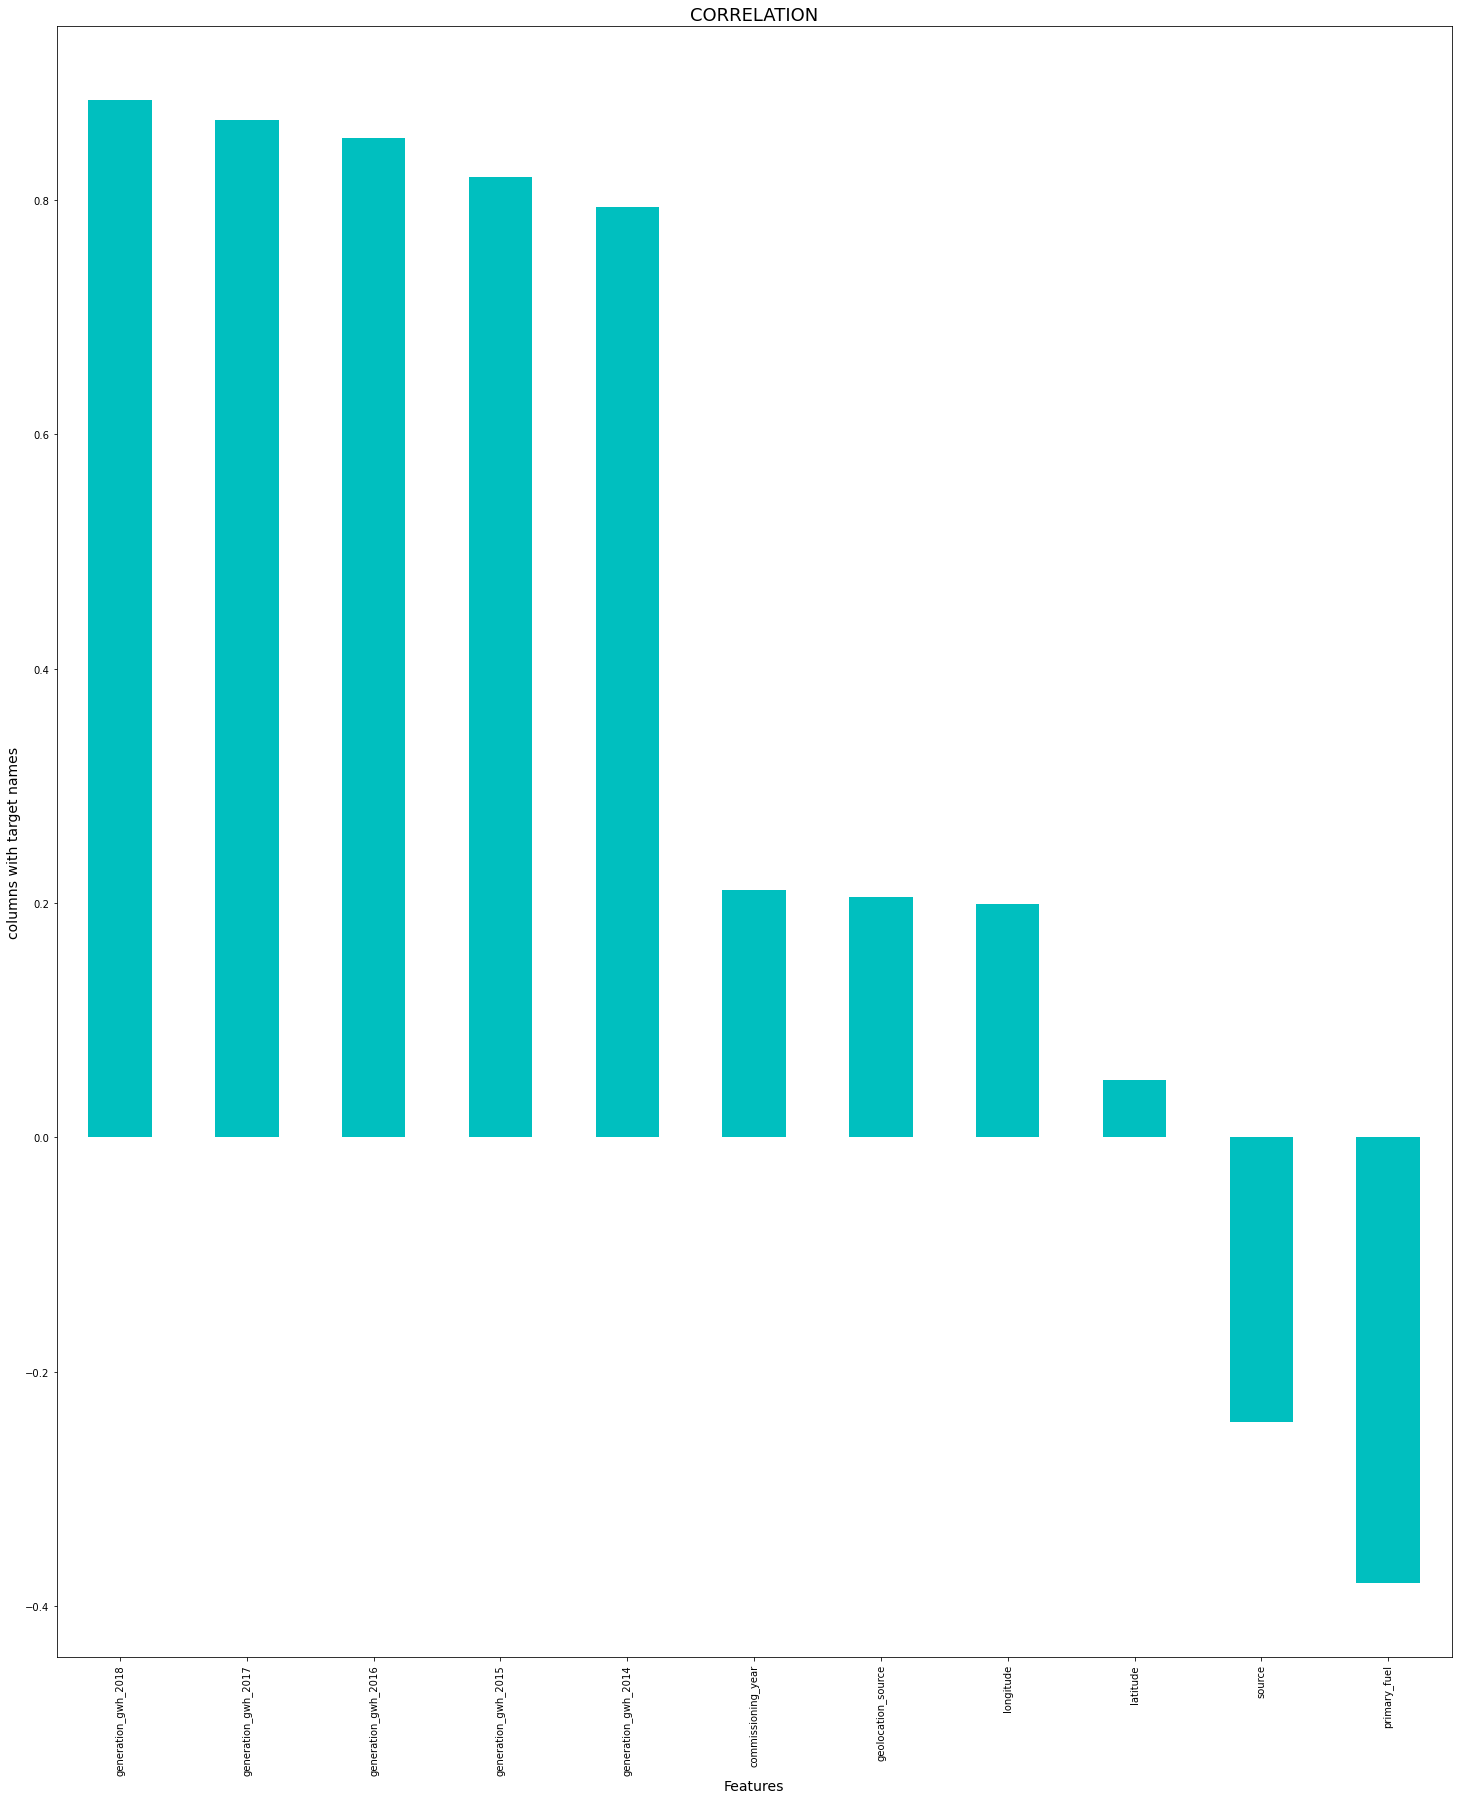

In [1783]:
#checking the columns which are positively and negatively correlated
plt.figure(figsize=(25,30))
Power.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

Here  positive correlated columns are upwards and Negative are    Downwards
Otherfuel1 and Longitude has a least relationship with target..

Now Lets Delete the columns which are Negatively corrlated to target variable

In [1785]:
Power

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6.0,2011.0,109.0,1.0,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1.0,2001.0,174.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7.0,2001.0,21.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2.0,2004.0,22.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1.0,2015.0,22.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1.0,2016.0,22.0,2.0,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6.0,2001.0,77.0,0.0,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,7.0,2001.0,21.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,1.0,2001.0,59.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375


All columns have count of 907 rows which means no missing value.. we can there is skewness and outliers present in dataset


In [1786]:
#to analyse the correlation of each column
Power.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.048849,0.199247,-0.380086,0.211175,-0.242483,0.205137,0.793496,0.819677,0.853012,0.868345,0.884846
latitude,0.048849,1.000000,0.035634,-0.007716,0.088083,0.054383,-0.182375,0.057208,0.052451,0.046296,0.056437,0.053731
longitude,0.199247,0.035634,1.000000,-0.352329,0.029612,-0.236743,0.249188,0.106819,0.123726,0.145603,0.153978,0.157367
primary_fuel,-0.380086,-0.007716,-0.352329,1.000000,-0.055288,0.054645,-0.484724,-0.240561,-0.249203,-0.259609,-0.263507,-0.271096
commissioning_year,0.211175,0.088083,0.029612,-0.055288,1.000000,0.100861,-0.073990,0.077024,0.108809,0.141025,0.153615,0.156992
source,-0.242483,0.054383,-0.236743,0.054645,0.100861,1.000000,-0.505614,-0.126022,-0.131299,-0.135199,-0.135115,-0.141406
geolocation_source,0.205137,-0.182375,0.249188,-0.484724,-0.073990,-0.505614,1.000000,0.101453,0.105701,0.108841,0.108773,0.113837
generation_gwh_2014,0.793496,0.057208,0.106819,-0.240561,0.077024,-0.126022,0.101453,1.000000,0.963717,0.935062,0.904068,0.895135
generation_gwh_2015,0.819677,0.052451,0.123726,-0.249203,0.108809,-0.131299,0.105701,0.963717,1.000000,0.973229,0.940225,0.933156
generation_gwh_2016,0.853012,0.046296,0.145603,-0.259609,0.141025,-0.135199,0.108841,0.935062,0.973229,1.000000,0.973907,0.964985


In [1787]:
Power

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6.0,2011.0,109.0,1.0,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1.0,2001.0,174.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7.0,2001.0,21.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2.0,2004.0,22.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1.0,2015.0,22.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1.0,2016.0,22.0,2.0,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6.0,2001.0,77.0,0.0,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,7.0,2001.0,21.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,1.0,2001.0,59.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375


In [1788]:
Power.corr()['capacity_mw'].sort_values()

primary_fuel          -0.380086
source                -0.242483
latitude               0.048849
longitude              0.199247
geolocation_source     0.205137
commissioning_year     0.211175
generation_gwh_2014    0.793496
generation_gwh_2015    0.819677
generation_gwh_2016    0.853012
generation_gwh_2017    0.868345
generation_gwh_2018    0.884846
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

# DESCRIPTIVE STATSTICS

In [1789]:
Power.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,906.0,326.558991,590.324956,0.0000,16.612500,59.600000,386.625000,4760.000
latitude,906.0,21.226829,6.083822,8.1689,17.065350,21.780000,25.178075,34.649
longitude,906.0,77.427884,4.817675,68.6447,74.387550,76.719500,79.207350,95.408
primary_fuel,906.0,3.201987,2.278421,0.0000,1.000000,3.000000,6.000000,7.000
commissioning_year,906.0,1998.726269,13.165673,1927.0000,1998.000000,2001.000000,2003.000000,2018.000
source,906.0,43.873068,44.661012,0.0000,22.000000,22.000000,29.750000,190.000
geolocation_source,906.0,1.732892,0.677467,0.0000,2.000000,2.000000,2.000000,2.000
generation_gwh_2014,906.0,1517.479764,2787.041277,0.0000,801.123775,801.123775,801.123775,28127.000
generation_gwh_2015,906.0,1510.953073,2986.525073,0.0000,711.181225,711.181225,711.181225,30539.000
generation_gwh_2016,906.0,1566.275463,3006.620856,0.0000,737.205450,737.205450,737.205450,30015.000


*Its Clearly shown above that all the columns have the count value of 18249 there are no negative values in the dataset and Few columns have very low values in it, where few have very high values in the datset.

<AxesSubplot:>

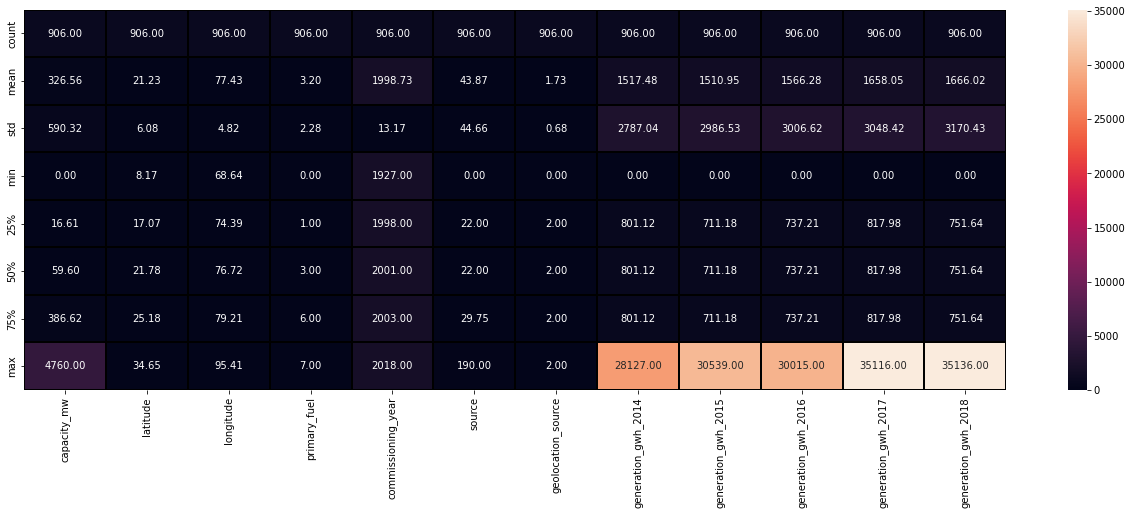

In [1790]:
plt.figure(figsize = (22,7))
sns.heatmap(Power.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

Outcome of describe() of dataset :-
from the above plotting we are determining mean,standard deviation,minimum and maximum value of each column



In [1791]:
Power.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          906 non-null    float64
 1   latitude             906 non-null    float64
 2   longitude            906 non-null    float64
 3   primary_fuel         906 non-null    float64
 4   commissioning_year   906 non-null    float64
 5   source               906 non-null    float64
 6   geolocation_source   906 non-null    float64
 7   generation_gwh_2014  906 non-null    float64
 8   generation_gwh_2015  906 non-null    float64
 9   generation_gwh_2016  906 non-null    float64
 10  generation_gwh_2017  906 non-null    float64
 11  generation_gwh_2018  906 non-null    float64
dtypes: float64(12)
memory usage: 124.3 KB


OUTLIERS CHECKING(Any One outlier method can be  used)

In [1792]:
colmlist=Power.columns.values
ncol=30
nrows=14

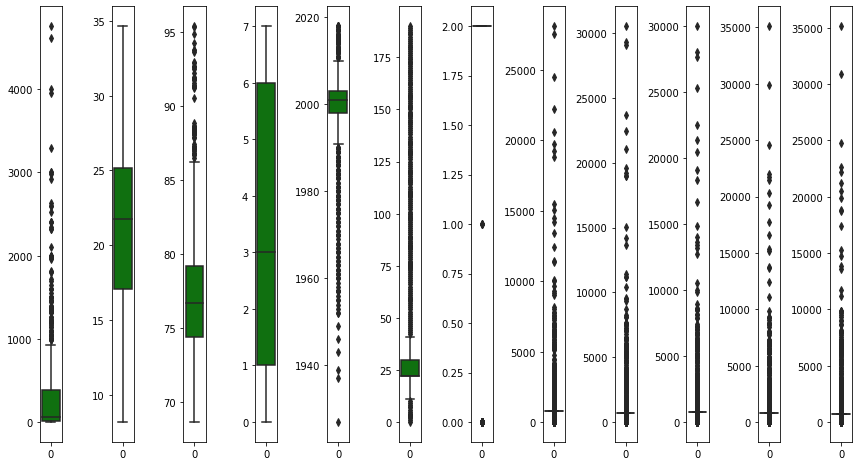

In [1793]:
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(colmlist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= Power[colmlist[i]],color='green',orient='v')
    plt.tight_layout()

capacity_mw               AxesSubplot(0.125,0.125;0.0545775x0.755)
latitude               AxesSubplot(0.190493,0.125;0.0545775x0.755)
longitude              AxesSubplot(0.255986,0.125;0.0545775x0.755)
primary_fuel           AxesSubplot(0.321479,0.125;0.0545775x0.755)
commissioning_year     AxesSubplot(0.386972,0.125;0.0545775x0.755)
source                 AxesSubplot(0.452465,0.125;0.0545775x0.755)
geolocation_source     AxesSubplot(0.517958,0.125;0.0545775x0.755)
generation_gwh_2014    AxesSubplot(0.583451,0.125;0.0545775x0.755)
generation_gwh_2015    AxesSubplot(0.648944,0.125;0.0545775x0.755)
generation_gwh_2016    AxesSubplot(0.714437,0.125;0.0545775x0.755)
generation_gwh_2017     AxesSubplot(0.77993,0.125;0.0545775x0.755)
generation_gwh_2018    AxesSubplot(0.845423,0.125;0.0545775x0.755)
dtype: object

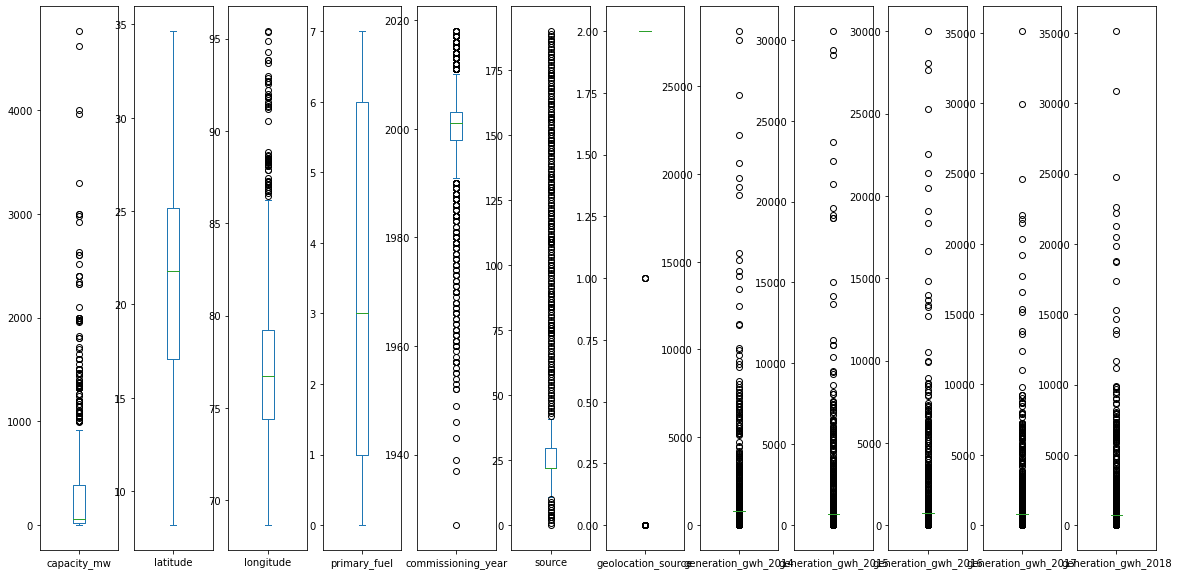

In [1794]:
# to find out outliers in the dataset
Power.plot(kind='box',subplots=True,figsize=(20,10))

We can see that the Outliers are present in the columns R,ERA,SHO,SV and E ...we have to treat this Outliers ..

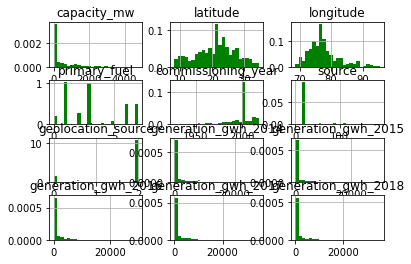

In [1795]:
#Lets plot all using Histogram and see the skewness again
 
#plt.rcParams['figure.figsize']=(20,30)
Power.hist(bins=25,color='green',density=True,label='Value',histtype='bar')
plt.show()

WE can see maximum data is not  normally distributed rest all are skewed or unbalanced data
Lets take some of the data and do some of the plotting of skewness although we can see all skewed columns on above plotting

Now Lets Remove Outliers Now

In [1796]:
#to check for outliers through zscore 
from scipy.stats import zscore
(np.abs(zscore( Power)) < 3).all()

capacity_mw            False
latitude                True
longitude              False
primary_fuel            True
commissioning_year     False
source                 False
geolocation_source      True
generation_gwh_2014    False
generation_gwh_2015    False
generation_gwh_2016    False
generation_gwh_2017    False
generation_gwh_2018    False
dtype: bool

In [1797]:
#to remove outliers in data set through zscore
z = np.abs(zscore( Power))
z.shape

(906, 12)

In [1798]:
threshold = 3
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
       147, 158, 179, 183, 191, 209, 209, 209, 209, 209, 209, 219, 222,
       244, 299, 308, 308, 308, 308, 308, 308, 321, 323, 333, 340, 342,
       345, 360, 363, 364, 364, 364, 364, 364, 364, 371, 375, 416, 427,
       444, 454, 478, 482, 482, 484, 493, 493, 493, 493, 493, 493, 494,
       494, 494, 494, 494, 494, 499, 519, 532, 538, 541, 546, 573, 577,
       583, 592, 601, 621, 623, 638, 648, 648, 648, 648, 648, 648, 657,
       657, 657, 657, 657, 657, 661, 669, 688, 694, 694, 694, 694, 694,
       694, 705, 708, 720, 720, 720, 720, 720, 723, 723, 723, 723, 723,
       725, 725, 725, 725, 725, 725, 727, 766, 785, 785, 785, 785, 785,
       785, 787, 806, 807, 807, 807, 807, 807, 807, 817, 831, 846, 847,
       869, 870, 878, 879, 879, 879, 879, 879, 879, 894, 899], dtype=int64), array([ 0,  8,  9, 10, 11,  5,  5,  0,  7,  8,  9, 10, 11,  0,  7,  2,  2,
        5,  0,  7,  8,  9, 10, 11,  4,  4,  2,  5,  0, 

In [1799]:
Power_new=Power[(z<3).all(axis=1)]
print(Power_new.shape)

(830, 12)


In [1800]:
Power.shape

(906, 12)

In [1801]:
Power_new.shape

(830, 12)

In [1802]:
print ("Old DataFrame =",Power.shape)
print ("New DataFrame =",Power_new.shape)
print ("Total dropped rows = ",Power.shape[0] - Power_new.shape[0])

Old DataFrame = (906, 12)
New DataFrame = (830, 12)
Total dropped rows =  76


In [1803]:
#to find % loss in data
loss = (906-831)/906* 100
print(loss)

8.27814569536424


In [1804]:
Power_new

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6.0,2011.0,109.0,1.0,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1.0,2001.0,174.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7.0,2001.0,21.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2.0,2004.0,22.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1.0,2015.0,22.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1.0,2016.0,22.0,2.0,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6.0,2001.0,77.0,0.0,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,7.0,2001.0,21.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,1.0,2001.0,59.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375


Now Lets Split the dataset into dependent and independent variable*

In [1805]:
# Independent column

x=Power_new.iloc[:,1:]
x

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,28.1839,73.2407,6.0,2011.0,109.0,1.0,801.123775,711.181225,737.205450,817.977250,751.644375
1,24.7663,74.6090,1.0,2001.0,174.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375
2,21.9038,69.3732,7.0,2001.0,21.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375
3,23.8712,91.3602,2.0,2004.0,22.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,21.9603,82.4091,1.0,2015.0,22.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,16.2949,77.3568,1.0,2016.0,22.0,2.0,801.123775,0.994875,233.596650,865.400000,686.500000
903,12.8932,78.1654,6.0,2001.0,77.0,0.0,801.123775,711.181225,737.205450,817.977250,751.644375
904,15.2758,75.5811,7.0,2001.0,21.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375
905,24.3500,73.7477,1.0,2001.0,59.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375


In [1806]:
x.shape

(830, 11)

In [1807]:
# Target or dependent variable

y=Power_new.iloc[0:,0]
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 830, dtype: float64

In [1808]:
y.shape

(830,)

# TRANSFORMING DATA TO REMOVE SKEWNESS

In [1809]:
Power.skew()

capacity_mw            3.121674
latitude              -0.163763
longitude              1.162239
primary_fuel           0.474577
commissioning_year    -1.718148
source                 1.825613
geolocation_source    -2.157970
generation_gwh_2014    5.318184
generation_gwh_2015    5.563508
generation_gwh_2016    5.278823
generation_gwh_2017    5.311959
generation_gwh_2018    5.130182
dtype: float64

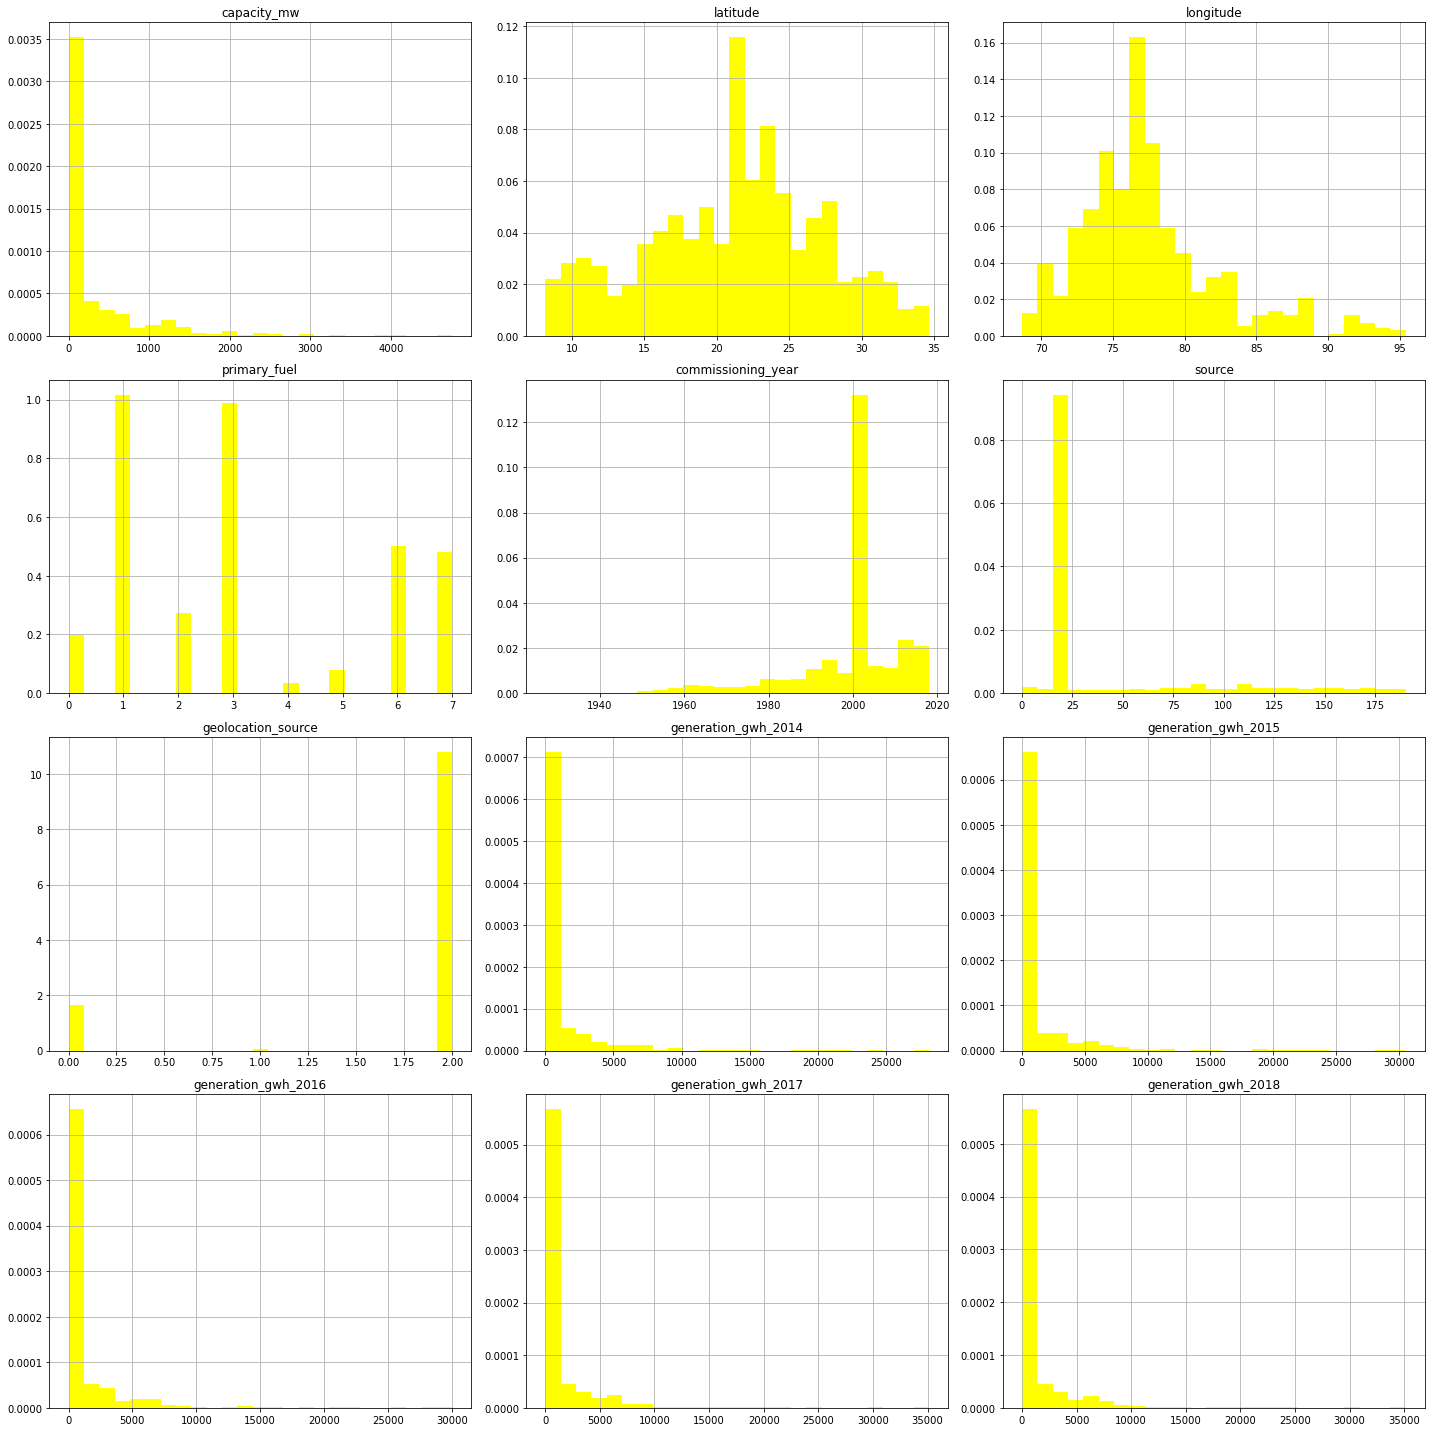

In [1810]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,20)
Power.hist(bins=25,color='yellow',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

there is skewness present  

Now Lets Remove Skewness Now

In [1811]:
Power_new.skew()

capacity_mw            1.963465
latitude              -0.134480
longitude              0.937607
primary_fuel           0.410083
commissioning_year    -1.269861
source                 1.776908
geolocation_source    -2.096131
generation_gwh_2014    2.924137
generation_gwh_2015    2.724600
generation_gwh_2016    2.663970
generation_gwh_2017    2.563483
generation_gwh_2018    2.628361
dtype: float64

Here We have skewness ,. Now remove the skewness from the given columns

In [1812]:
Power_new.head()


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6.0,2011.0,109.0,1.0,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1.0,2001.0,174.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7.0,2001.0,21.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2.0,2004.0,22.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1.0,2015.0,22.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [1813]:
from sklearn.preprocessing import power_transform
x_new=power_transform(Power,method='yeo-johnson')

In [1814]:
pd.DataFrame(x_new).skew()

0     0.021911
1    -0.076797
2     0.003048
3    -0.046704
4    -0.524593
5    -0.213258
6    -2.130869
7     0.285368
8     0.221674
9     0.203534
10    0.196304
11    0.192601
dtype: float64

We can see that the skewness has been removed from the given columns  .

In [1815]:
# It will be a 2 dimensional data contaning rows and columns

from sklearn.preprocessing import StandardScaler
#transforming my dataset into a standard normal distribution
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.152417,-0.877323,1.169995,1.010203,1.568253,-1.051532,-0.277667,-0.304774,-0.309557,-0.301767,-0.319125
1,0.594110,-0.560355,-0.990877,0.118215,3.109116,0.403087,-0.277667,-0.304774,-0.309557,-0.301767,-0.319125
2,0.126485,-1.773232,1.602169,0.118215,-0.517839,0.403087,-0.277667,-0.304774,-0.309557,-0.301767,-0.319125
3,0.447884,3.320073,-0.558703,0.385812,-0.494133,0.403087,-0.399804,-0.219242,-0.217226,-0.394753,-0.391894
4,0.135715,1.246544,-0.990877,1.366999,-0.494133,0.403087,1.210897,3.053657,3.106838,2.452551,3.468522
...,...,...,...,...,...,...,...,...,...,...,...
825,-0.789798,0.076175,-0.990877,1.456197,-0.494133,0.403087,-0.277667,-0.762993,-0.622051,-0.273171,-0.356927
826,-1.345508,0.263488,1.169995,0.118215,0.809674,-2.506151,-0.277667,-0.304774,-0.309557,-0.301767,-0.319125
827,-0.956281,-0.335167,1.602169,0.118215,-0.517839,0.403087,-0.277667,-0.304774,-0.309557,-0.301767,-0.319125
828,0.526102,-0.759876,-0.990877,0.118215,0.382974,0.403087,-0.277667,-0.304774,-0.309557,-0.301767,-0.319125


In [1816]:
x.mean()

latitude               5.069573e-16
longitude              1.000254e-15
primary_fuel           7.303395e-17
commissioning_year    -7.118536e-15
source                 3.057795e-16
geolocation_source    -3.899157e-16
generation_gwh_2014   -1.074107e-16
generation_gwh_2015   -1.161053e-16
generation_gwh_2016    9.242941e-17
generation_gwh_2017    2.116112e-16
generation_gwh_2018    2.568227e-17
dtype: float64

In [1817]:
x.std()

latitude               1.000603
longitude              1.000603
primary_fuel           1.000603
commissioning_year     1.000603
source                 1.000603
geolocation_source     1.000603
generation_gwh_2014    1.000603
generation_gwh_2015    1.000603
generation_gwh_2016    1.000603
generation_gwh_2017    1.000603
generation_gwh_2018    1.000603
dtype: float64

Balancing the dataset over here,otherwise it will be a baised dataset

In [1818]:
x.shape

(830, 11)

In [1819]:
y.value_counts()

5.00       37
600.00     20
1200.00    19
10.00      19
15.00      18
           ..
855.00      1
32.50       1
119.80      1
21.84       1
106.60      1
Name: capacity_mw, Length: 328, dtype: int64

<AxesSubplot:xlabel='capacity_mw', ylabel='count'>

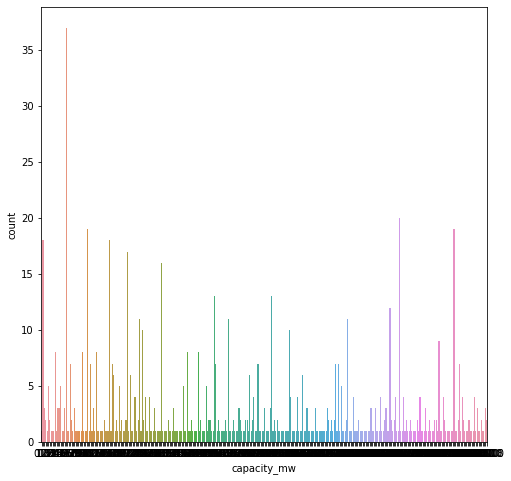

In [1820]:
plt.figure(figsize=(8,8))
sns.countplot(y)

Now Lets Whether Multicollinearity is present in the dataset or not 

WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [1821]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [1822]:
vif_cal()

    VIF FACTOR             FEATURES
0     1.074450             latitude
1     1.282601            longitude
2     1.718633         primary_fuel
3     1.104911   commissioning_year
4     1.597466               source
5     1.988463   geolocation_source
6     6.484436  generation_gwh_2014
7    13.213015  generation_gwh_2015
8    15.391612  generation_gwh_2016
9    19.786598  generation_gwh_2017
10   17.344897  generation_gwh_2018


 Let's move to buliding machine learning models...

Model Training and Testing

Now Lets Train and Test the model using Regression Models

In [1823]:
# to find out best random state
max_r2=0
maxRs=0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    r2_score1=r2_score(y_test,pred_test)
    if r2_score1>max_r2:
        max_r2=r2_score1
        maxRs=i
print("Best r2_score is ", max_r2,"on Random_State",maxRs)

Best r2_score is  0.8105564973242706 on Random_State 72


In [1824]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=72)

In [1825]:
x_train

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
547,1.770385,-0.250430,-0.126528,-1.844159,-0.494133,0.403087,0.068488,0.350051,0.078804,0.189319,0.118025
639,-1.743687,-0.045812,-0.126528,-3.003743,-0.494133,0.403087,-0.722389,-0.712738,-0.727924,-0.743742,-0.680428
711,0.106261,-0.071456,1.602169,0.118215,-0.517839,0.403087,-0.277667,-0.304774,-0.309557,-0.301767,-0.319125
681,1.314979,-0.696751,-0.990877,0.207414,-0.494133,0.403087,5.287766,2.644356,1.734159,1.890316,3.002967
177,-1.062041,-0.274081,-1.423051,0.118215,2.445360,0.403087,-0.277667,-0.304774,-0.309557,-0.301767,-0.319125
...,...,...,...,...,...,...,...,...,...,...,...
734,1.056720,2.692369,-0.126528,1.545396,-0.494133,0.403087,-0.277667,-0.304774,-0.575962,1.862566,1.703395
74,-1.213576,-0.322149,-0.126528,-2.825345,-0.494133,0.403087,-0.777838,-0.737904,-0.750293,-0.785603,-0.723407
46,-0.207378,0.536071,-0.990877,0.118215,-0.683778,0.403087,-0.277667,-0.304774,-0.309557,-0.301767,-0.319125
787,2.126106,-0.658413,-0.126528,-0.327779,-0.494133,0.403087,1.228010,1.343974,0.963652,0.614771,1.004712


In [1826]:
x_test

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
807,1.541710,0.583490,-0.126528,0.564209,-0.494133,0.403087,0.392350,0.013581,0.493775,0.501516,0.360209
771,1.001716,2.670756,-0.126528,-0.595375,-0.494133,0.403087,-0.277667,-0.304774,-0.309557,-0.301767,-0.319125
762,-0.947394,-0.336187,1.602169,0.118215,-0.517839,0.403087,-0.277667,-0.304774,-0.309557,-0.301767,-0.319125
132,1.873287,-0.241442,-0.126528,-0.506176,-0.494133,0.403087,0.880125,0.920734,0.606353,0.611423,0.679230
432,-1.217579,-0.459077,-0.126528,-0.595375,-0.494133,0.403087,-0.277667,-0.304774,-0.309557,-0.301767,-0.319125
...,...,...,...,...,...,...,...,...,...,...,...
703,-0.625096,-0.555259,1.602169,0.118215,-0.517839,0.403087,-0.277667,-0.304774,-0.309557,-0.301767,-0.319125
591,-0.423785,-0.181374,-1.423051,0.118215,1.615664,0.403087,-0.277667,-0.304774,-0.309557,-0.301767,-0.319125
602,0.407828,3.281758,-0.558703,0.653408,-0.494133,0.403087,-0.534081,-0.462471,-0.497588,-0.549736,-0.501385
374,0.377933,-0.886427,1.169995,0.118215,0.240740,-2.506151,-0.277667,-0.304774,-0.309557,-0.301767,-0.319125


In [1827]:
y_train

591     396.0
694      30.0
774       6.3
743    1500.0
185      22.0
        ...  
799    1200.0
76       26.0
47       67.5
858     480.0
508       3.0
Name: capacity_mw, Length: 581, dtype: float64

In [1828]:
y_test

882    400.0
840      8.0
830     50.4
135    540.0
462      9.0
       ...  
765     16.5
640     12.5
652     63.0
400     10.0
109     81.5
Name: capacity_mw, Length: 249, dtype: float64

  REGRESSION,ENSEMBLE TECHNIQUE(GradientBoostingClassifier,RandomForestClassifier)

In [1829]:
models=[SVR(),DecisionTreeRegressor(),LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),AdaBoostRegressor()]

In [1830]:
maelist=[]
mselist=[]
rmselist=[]
r2list=[]
def create_model(model):
    m=model
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    p=m.predict(x_test)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    mae=mean_absolute_error(p,y_test)
    mse=mean_squared_error(p,y_test)
    rmse=np.sqrt(mean_squared_error(p,y_test))
    r2=r2_score(y_test,p)
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    plt.figure(figsize=(10,10))
    sns.regplot(y_test,predm,color="purple")
    plt.show()
    print(m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print("Cross Validation Score:",crossval)
    print("Difference Between r2_score and CrossValidation Score:",abs(r2-crossval))
    print('---------------------------------------------------------------------------------------------------------')

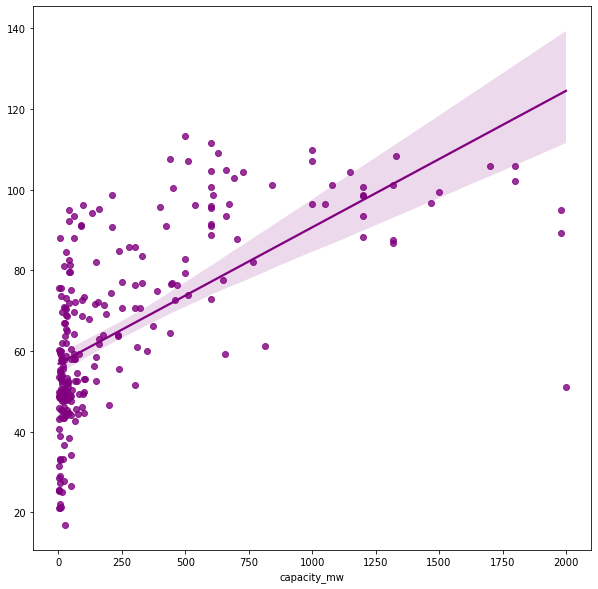

SVR()
Mean absolute error 233.39792623901235
Mean squared error 205721.91681258948
Root Mean squared error 453.5657800282
R2 Score -0.16448644858432382
At random state SVR(),the training accuracy is :- -0.16587960541594815
At random state SVR(),the testing accuracy is :- -0.16448644858432382
Cross Validation Score: -0.1613311065794732
Difference Between r2_score and CrossValidation Score: 0.0031553420048506253
---------------------------------------------------------------------------------------------------------


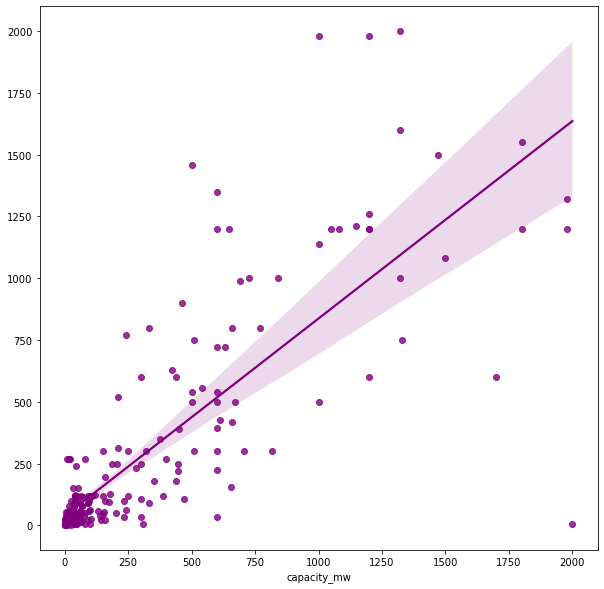

DecisionTreeRegressor()
Mean absolute error 123.68553547523427
Mean squared error 65226.90675369216
Root Mean squared error 255.3955887514351
R2 Score 0.630783874783051
At random state DecisionTreeRegressor(),the training accuracy is :- 0.9998527178944258
At random state DecisionTreeRegressor(),the testing accuracy is :- 0.630783874783051
Cross Validation Score: 0.6110666795693996
Difference Between r2_score and CrossValidation Score: 0.01971719521365134
---------------------------------------------------------------------------------------------------------


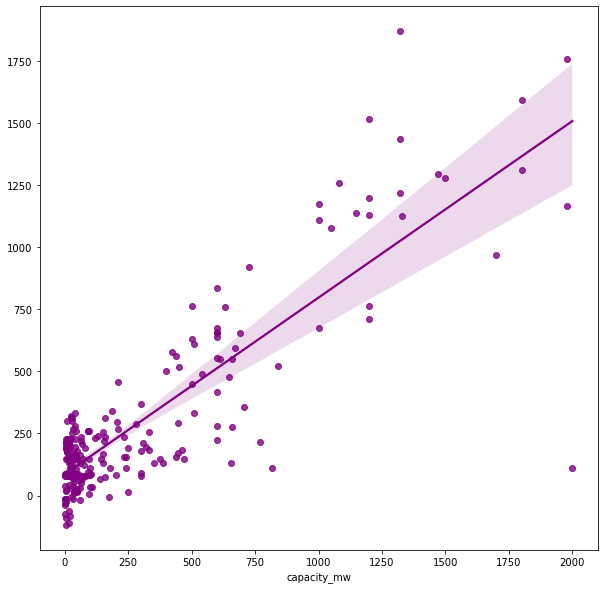

LinearRegression()
Mean absolute error 140.99123742237444
Mean squared error 47442.905938807904
Root Mean squared error 217.81392503420875
R2 Score 0.7314499986040299
At random state LinearRegression(),the training accuracy is :- 0.6993769881155535
At random state LinearRegression(),the testing accuracy is :- 0.7314499986040299
Cross Validation Score: 0.6844998741505331
Difference Between r2_score and CrossValidation Score: 0.04695012445349678
---------------------------------------------------------------------------------------------------------


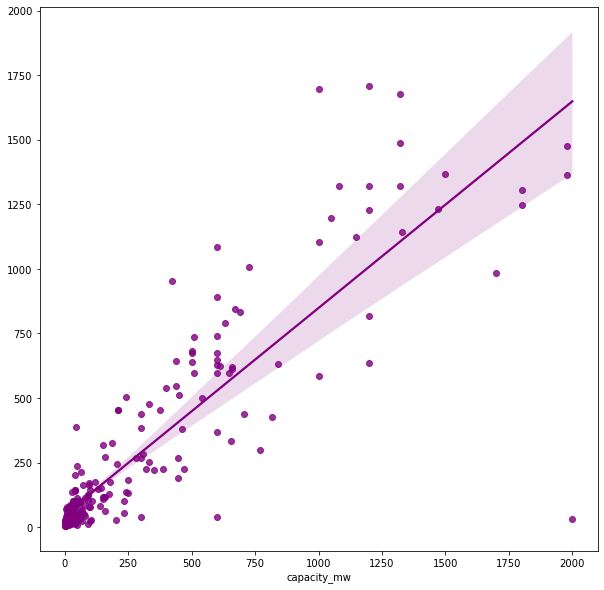

RandomForestRegressor()
Mean absolute error 98.26439295938285
Mean squared error 41756.515272568955
Root Mean squared error 204.3441099532085
R2 Score 0.7636377449306596
At random state RandomForestRegressor(),the training accuracy is :- 0.9715883697362973
At random state RandomForestRegressor(),the testing accuracy is :- 0.7636377449306596
Cross Validation Score: 0.7785825733722727
Difference Between r2_score and CrossValidation Score: 0.014944828441613045
---------------------------------------------------------------------------------------------------------


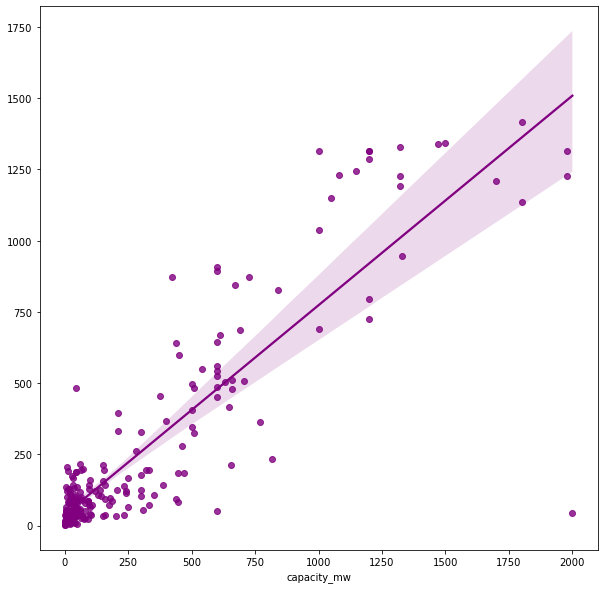

KNeighborsRegressor()
Mean absolute error 100.44420481927712
Mean squared error 40342.62444128916
Root Mean squared error 200.85473467481208
R2 Score 0.7716410570634298
At random state KNeighborsRegressor(),the training accuracy is :- 0.8188709881498911
At random state KNeighborsRegressor(),the testing accuracy is :- 0.7716410570634298
Cross Validation Score: 0.7445304841739033
Difference Between r2_score and CrossValidation Score: 0.027110572889526452
---------------------------------------------------------------------------------------------------------


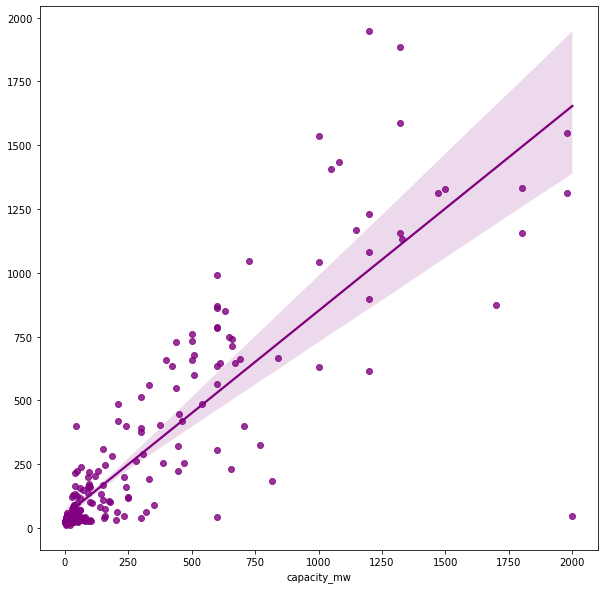

GradientBoostingRegressor()
Mean absolute error 107.72829234225905
Mean squared error 45997.9861587604
Root Mean squared error 214.47141105229014
R2 Score 0.7396289497300278
At random state GradientBoostingRegressor(),the training accuracy is :- 0.9658827542147604
At random state GradientBoostingRegressor(),the testing accuracy is :- 0.7396289497300278
Cross Validation Score: 0.7475495656723374
Difference Between r2_score and CrossValidation Score: 0.007920615942309639
---------------------------------------------------------------------------------------------------------


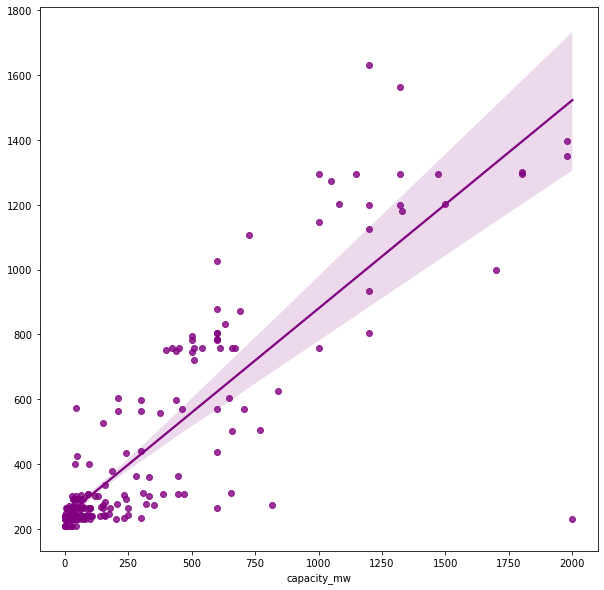

AdaBoostRegressor()
Mean absolute error 217.2053565863386
Mean squared error 66149.30034499762
Root Mean squared error 257.1950628316913
R2 Score 0.6255626768962221
At random state AdaBoostRegressor(),the training accuracy is :- 0.7342679811312756
At random state AdaBoostRegressor(),the testing accuracy is :- 0.6255626768962221
Cross Validation Score: 0.5140381174457457
Difference Between r2_score and CrossValidation Score: 0.11152455945047646
---------------------------------------------------------------------------------------------------------


In [1831]:
for i in models:
    create_model(i)

Now Lets consider model which Model should we go for as a final model

Hyper parameter tuning

In [1833]:
params = {'n_estimators': [13,15,17],
         'max_depth':[5,6],
         'min_samples_split':[5,6],
         'min_samples_leaf':[3,5,6]
         }

In [1834]:
from sklearn.model_selection import RandomizedSearchCV
RSCV = RandomizedSearchCV(RandomForestRegressor(),params, cv=5)

In [1835]:
RSCV.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 6],
                                        'min_samples_leaf': [3, 5, 6],
                                        'min_samples_split': [5, 6],
                                        'n_estimators': [13, 15, 17]})

In [1836]:
RSCV.best_params_

{'n_estimators': 17,
 'min_samples_split': 6,
 'min_samples_leaf': 6,
 'max_depth': 5}

In [1837]:
Final_Model = RandomForestRegressor(n_estimators=17,min_samples_split=6,min_samples_leaf=6,max_depth=5)
Classifier = Final_Model.fit(x_train, y_train)
lr_pred = Final_Model.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Final Model is:", lr_r2_score*100)

R2 score for the Final Model is: 76.29369418897396


In [1838]:
Final_Model

RandomForestRegressor(max_depth=5, min_samples_leaf=6, min_samples_split=6,
                      n_estimators=17)

In [1839]:
from sklearn.model_selection import GridSearchCV

In [1840]:
params = {'n_estimators': [13,15,17],
         'max_depth':[5,6],
         'min_samples_split':[5,6],
         'min_samples_leaf':[3,5,6]
         }

In [1841]:
GSCV=GridSearchCV(RandomForestRegressor(),params, cv=5)


In [1842]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6], 'min_samples_leaf': [3, 5, 6],
                         'min_samples_split': [5, 6],
                         'n_estimators': [13, 15, 17]})

In [1843]:
GSCV.best_params_

{'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 17}

In [1844]:
Last_Model = RandomForestRegressor(n_estimators=17,min_samples_split=6,min_samples_leaf=3,max_depth=6)
Classifier = Last_Model.fit(x_train, y_train)
lr_pred = Last_Model.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Last_Model is:", lr_r2_score*100)

R2 score for the Last_Model is: 75.76141851603685


In [1845]:
Last_Model

RandomForestRegressor(max_depth=6, min_samples_leaf=3, min_samples_split=6,
                      n_estimators=17)

In [1846]:
# to improve accuracy of model
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [1847]:
lasso= Lasso(alpha=0.0001)

In [1848]:
lasso.fit(x_train,y_train)

Lasso(alpha=0.0001)

In [1849]:
lasso.score(x_train,y_train)

0.6993769881122034

In [1850]:
lasso_pred=lasso.predict(x_test)

In [1851]:
r2_score(y_test,lasso_pred)

0.7314501236417932

In [1852]:
ridge=Ridge(alpha=0.1)

In [1853]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [1854]:
ridge.score(x_train,y_train)*100

69.93768610254823

In [1855]:
ridge_pred=ridge.predict(x_test)

In [1856]:
r2_score(y_test,ridge_pred)

0.7314777278778035

save the final model

In [1865]:
#saving the model
import joblib
joblib.dump(Final_Model,'Power.pkl')

['Power.pkl']

In [1866]:
#Loading the saved model
Power=joblib.load('Power.pkl')

Prediction

In [1867]:
prediction =Power.predict(x_test)
prediction

array([ 598.38641931,   59.98848954,   30.20752016,  698.83025356,
         30.20752016,   34.34503846,   34.34503846,  124.59438629,
         30.20752016,  110.85054811,   30.20752016,   34.34503846,
         34.34503846,  369.02832213,   28.7070947 ,   30.20752016,
         56.00019563, 1113.98837814,   30.20752016,  182.76769008,
        106.5960692 ,  113.2319498 ,   34.34503846,   34.34503846,
        119.26095991,   34.34503846,  326.43792226,  117.50180431,
       1491.10331646,   34.34503846,  117.50180431,  493.85616643,
         30.20752016,   34.34503846,  148.24269407, 1275.05938375,
         30.20752016,  578.219304  ,   30.20752016,  694.85439771,
         30.20752016,  380.4872372 ,  100.45832104,   34.34503846,
       1347.87710832,  100.45832104,   56.21369963,   28.7070947 ,
         30.20752016,   30.20752016,  106.48733114,  106.48733114,
        116.04426842,   34.34503846,  621.11937195, 1376.63487065,
        326.16463903, 1405.30152487,  202.93130802,   56.00019

In [1868]:
pd.DataFrame([Power.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,239,240,241,242,243,244,245,246,247,248
Predicted,598.386419,59.98849,30.20752,698.830254,30.20752,34.345038,34.345038,124.594386,30.20752,110.850548,...,28.707095,33.436712,353.697062,30.20752,1263.365137,30.20752,34.345038,178.048904,28.707095,51.862677
Original,400.000000,8.00000,50.40000,540.000000,9.00000,10.000000,46.000000,234.000000,10.50000,30.000000,...,5.000000,34.650000,240.000000,20.00000,1320.000000,16.50000,12.500000,63.000000,10.000000,81.500000


<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

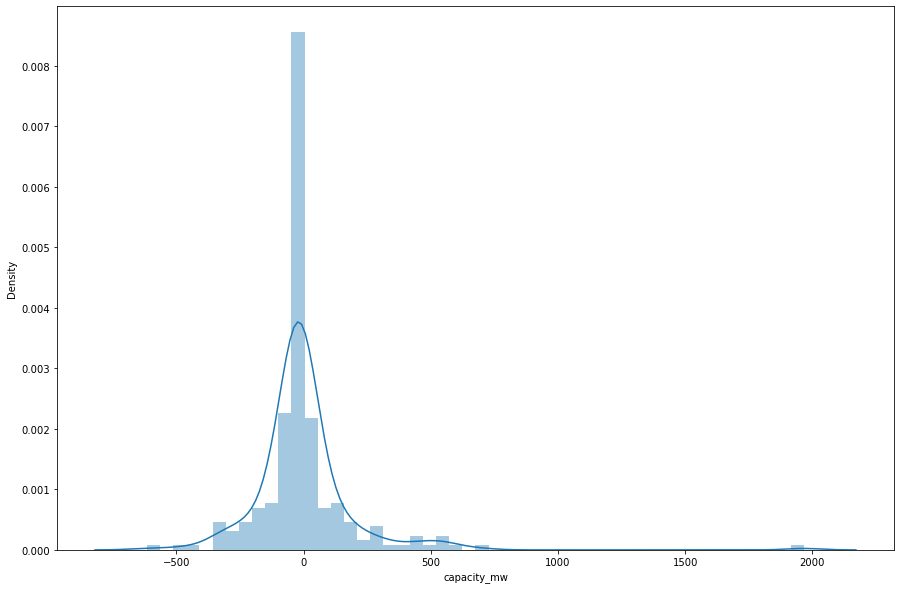

In [1869]:
plt.figure(figsize=(15,10))
sns.distplot(y_test-prediction)

In [1870]:
import pickle
filename = 'Power.pkl'
pickle.dump(Last_Model,open(filename, 'wb'))

In [1871]:
loaded_model = pickle.load(open(filename, 'rb'))
predicted = loaded_model.score(x_test,y_test)*100
print(predicted)

75.76141851603685


<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

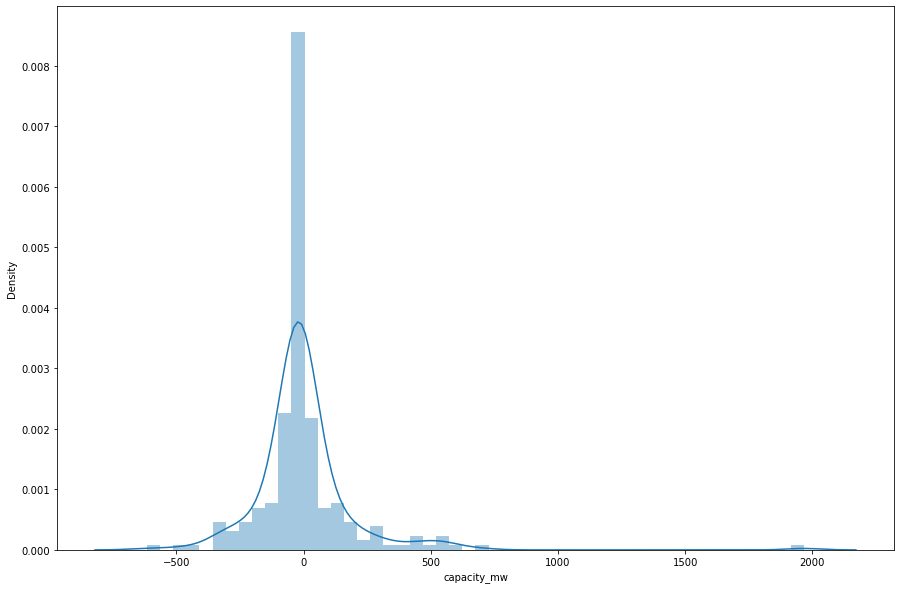

In [1872]:
plt.figure(figsize=(15,10))
sns.distplot(y_test-prediction)

# Power project as Classifier problem


In [1698]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.preprocessing import power_transform
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics  import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

Extracting the Data

In [1674]:
Power_new

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6.0,2011.0,109.0,1.0,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1.0,2001.0,174.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7.0,2001.0,21.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2.0,2004.0,22.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1.0,2015.0,22.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1.0,2016.0,22.0,2.0,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6.0,2001.0,77.0,0.0,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,7.0,2001.0,21.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,1.0,2001.0,59.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375


In [1675]:
# List of values in the target column
Power_new['primary_fuel'].value_counts()

1.0    229
3.0    220
7.0    122
6.0    121
2.0     64
0.0     45
5.0     20
4.0      9
Name: primary_fuel, dtype: int64

In [1676]:
#Frequency of 'primary_fuel'
Power_new['primary_fuel'].value_counts()

1.0    229
3.0    220
7.0    122
6.0    121
2.0     64
0.0     45
5.0     20
4.0      9
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

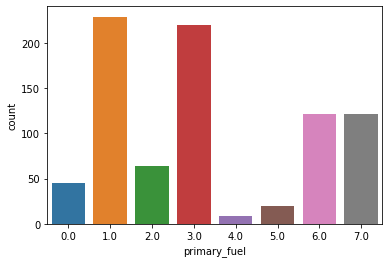

In [1677]:
# Plotting the 'primary_fuel' frequency
sns.countplot(data=Power_new,x='primary_fuel')

In [1678]:
#Normalizing the frequency table of 'primary_fuel' variable
Power_new['primary_fuel'].value_counts(normalize=True)

1.0    0.275904
3.0    0.265060
7.0    0.146988
6.0    0.145783
2.0    0.077108
0.0    0.054217
5.0    0.024096
4.0    0.010843
Name: primary_fuel, dtype: float64

In [1679]:
#Frequency table
Power_new['primary_fuel'].value_counts()

1.0    229
3.0    220
7.0    122
6.0    121
2.0     64
0.0     45
5.0     20
4.0      9
Name: primary_fuel, dtype: int64

In [1680]:
Power_new.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.051978,0.268193,-0.409114,0.223524,-0.274454,0.239615,0.648685,0.698132,0.771406,0.788833,0.799987
latitude,0.051978,1.000000,-0.015548,-0.009774,0.098745,0.071657,-0.193691,0.079195,0.068511,0.053620,0.069876,0.064446
longitude,0.268193,-0.015548,1.000000,-0.395631,0.079546,-0.246147,0.272611,0.118082,0.151948,0.193022,0.194759,0.207195
primary_fuel,-0.409114,-0.009774,-0.395631,1.000000,-0.067808,0.063306,-0.471610,-0.252890,-0.277332,-0.288132,-0.287707,-0.295941
commissioning_year,0.223524,0.098745,0.079546,-0.067808,1.000000,0.080357,-0.054998,0.056184,0.123189,0.193235,0.210117,0.203878
source,-0.274454,0.071657,-0.246147,0.063306,0.080357,1.000000,-0.520801,-0.137204,-0.150599,-0.152963,-0.149113,-0.157690
geolocation_source,0.239615,-0.193691,0.272611,-0.471610,-0.054998,-0.520801,1.000000,0.111924,0.122851,0.124779,0.121639,0.128635
generation_gwh_2014,0.648685,0.079195,0.118082,-0.252890,0.056184,-0.137204,0.111924,1.000000,0.913573,0.801805,0.753687,0.753595
generation_gwh_2015,0.698132,0.068511,0.151948,-0.277332,0.123189,-0.150599,0.122851,0.913573,1.000000,0.908892,0.835132,0.832245
generation_gwh_2016,0.771406,0.053620,0.193022,-0.288132,0.193235,-0.152963,0.124779,0.801805,0.908892,1.000000,0.935934,0.926812


In [1681]:
Power_new.corr()['primary_fuel'].sort_values()

geolocation_source    -0.471610
capacity_mw           -0.409114
longitude             -0.395631
generation_gwh_2018   -0.295941
generation_gwh_2016   -0.288132
generation_gwh_2017   -0.287707
generation_gwh_2015   -0.277332
generation_gwh_2014   -0.252890
commissioning_year    -0.067808
latitude              -0.009774
source                 0.063306
primary_fuel           1.000000
Name: primary_fuel, dtype: float64

<AxesSubplot:>

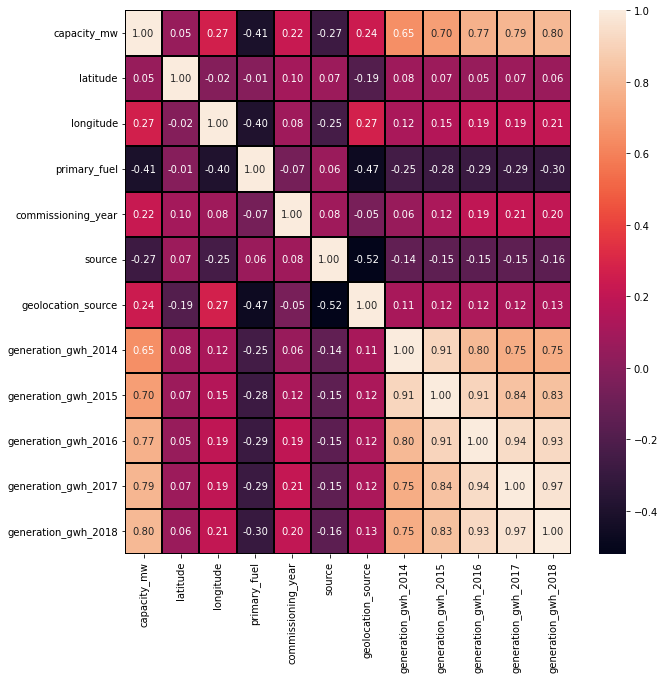

In [1682]:
plt.figure(figsize = (10,10))
sns.heatmap(Power_new.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

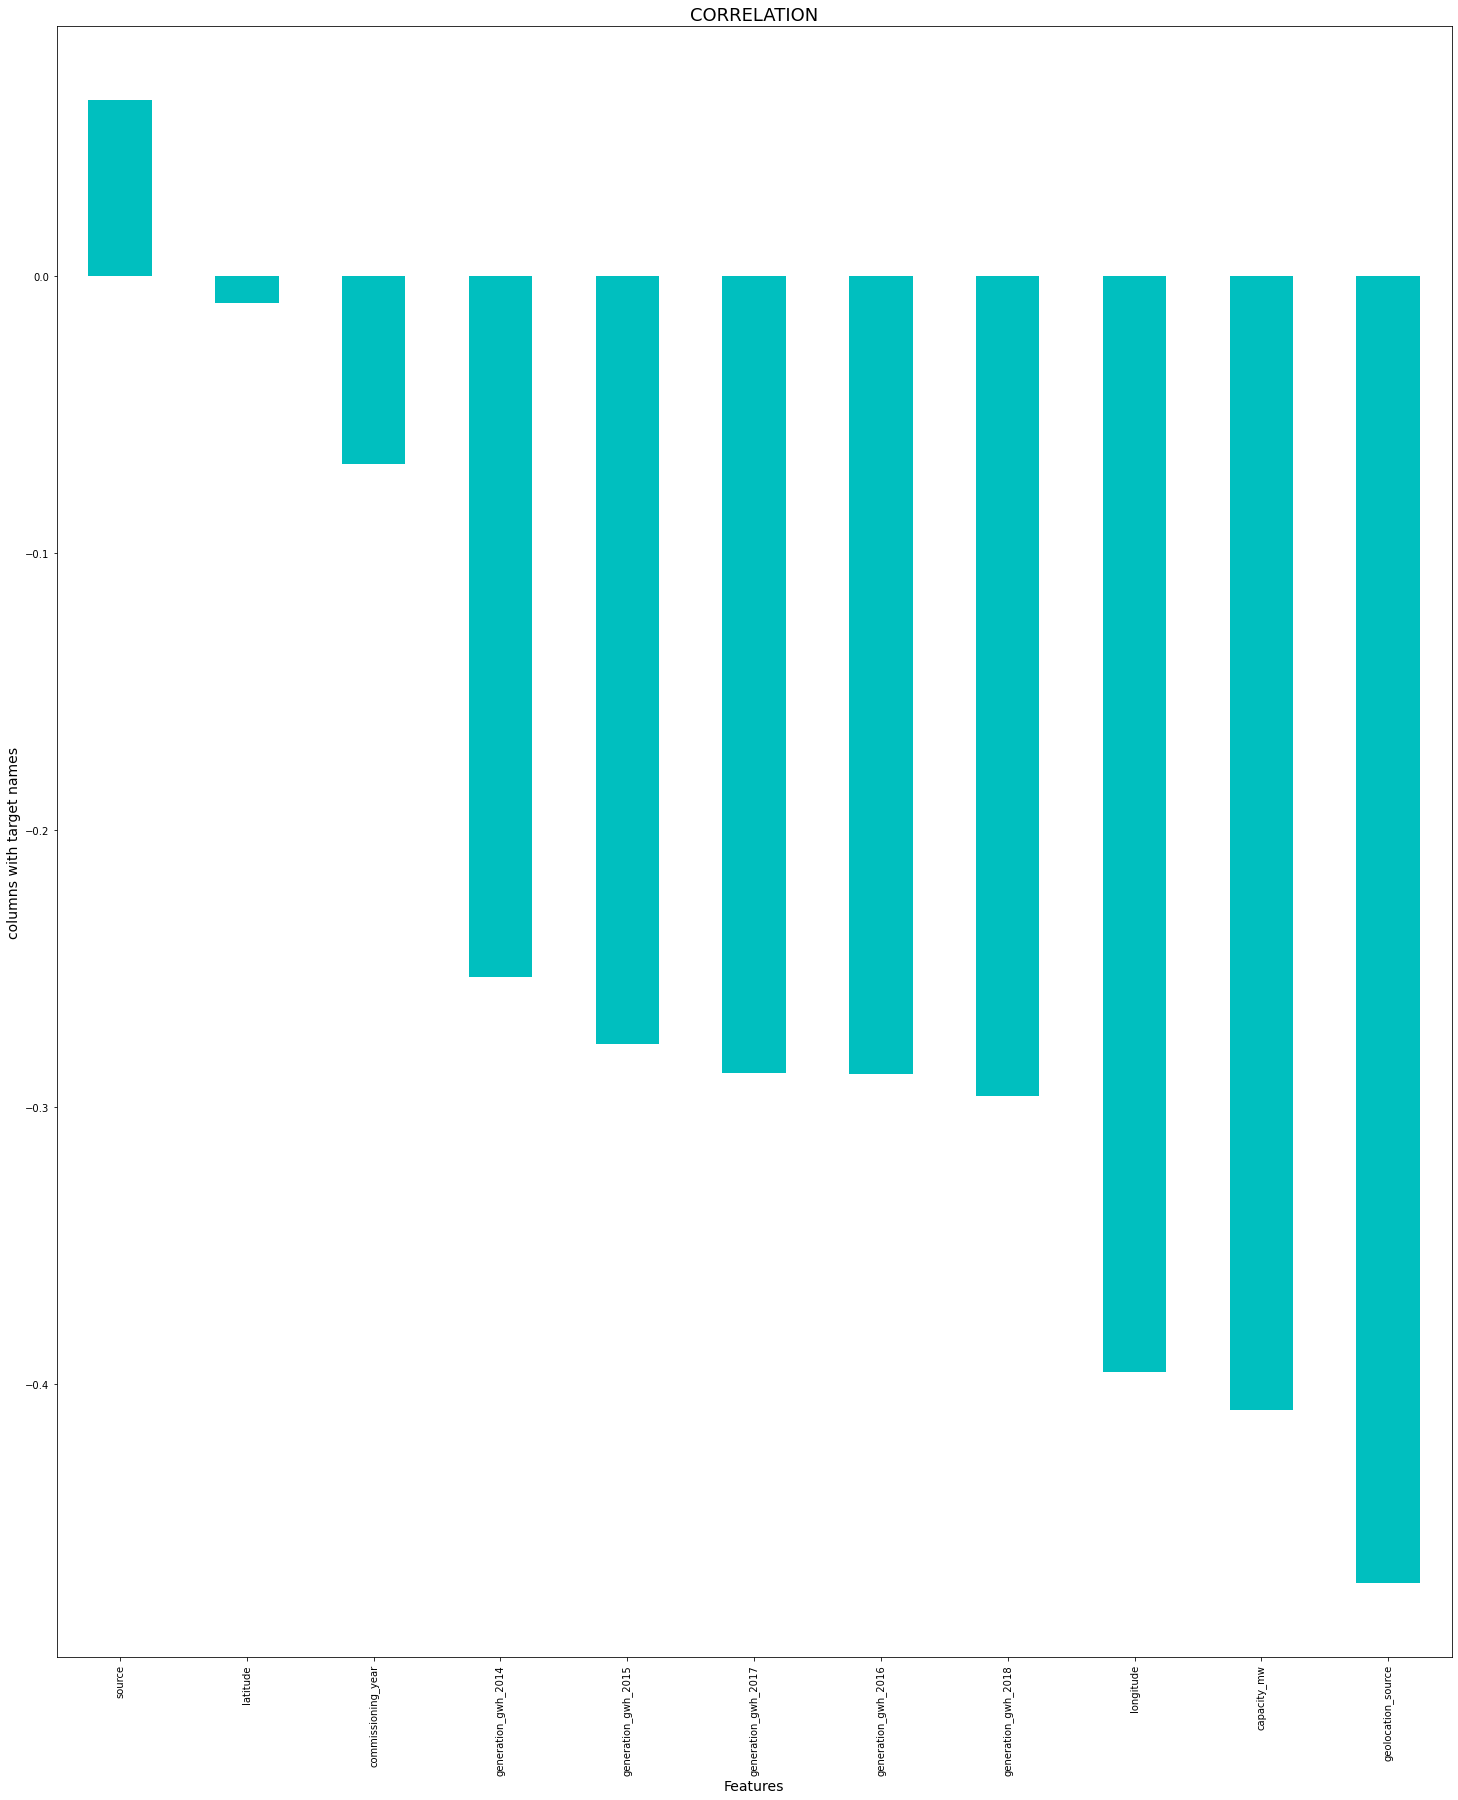

In [1683]:
#checking the columns which are positively and negatively correlated
plt.figure(figsize=(25,30))
Power_new.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

In [1684]:
#to check for outliers through zscore 
from scipy.stats import zscore
(np.abs(zscore( Power_new)) < 3).all()

capacity_mw            False
latitude                True
longitude              False
primary_fuel            True
commissioning_year     False
source                 False
geolocation_source      True
generation_gwh_2014    False
generation_gwh_2015    False
generation_gwh_2016    False
generation_gwh_2017    False
generation_gwh_2018    False
dtype: bool

In [1685]:
#to remove outliers in data set through zscore
z = np.abs(zscore( Power_new))
z.shape

(830, 12)

In [1686]:
threshold = 3
print(np.where(z>3))

(array([  1,   3,   4,   4,   4,   4,  12,  12,  12,  12,  12,  23,  43,
        43,  43,  43,  43,  56,  57,  60,  60,  60,  69,  73,  76,  76,
        87,  90,  90, 100, 156, 156, 161, 161, 181, 186, 210, 227, 241,
       248, 267, 267, 267, 275, 275, 281, 284, 284, 284, 294, 294, 294,
       294, 295, 295, 295, 316, 316, 316, 316, 331, 342, 342, 342, 342,
       342, 344, 344, 344, 344, 344, 348, 351, 352, 352, 362, 364, 364,
       364, 364, 364, 365, 365, 365, 365, 379, 380, 388, 390, 390, 420,
       420, 425, 425, 425, 425, 425, 439, 441, 442, 442, 445, 448, 449,
       460, 462, 482, 485, 489, 489, 489, 489, 489, 492, 494, 497, 497,
       497, 504, 524, 524, 524, 524, 526, 535, 544, 552, 552, 571, 572,
       572, 572, 572, 572, 577, 584, 584, 584, 584, 595, 596, 596, 596,
       599, 602, 604, 604, 604, 604, 608, 619, 623, 624, 628, 636, 636,
       636, 636, 636, 639, 641, 644, 644, 644, 655, 664, 664, 676, 676,
       678, 681, 681, 718, 723, 723, 723, 723, 727, 727, 727, 7

In [1687]:
Power_new1=Power_new[(z<3).all(axis=1)]
print(Power_new1.shape)

(730, 12)


In [1688]:
print(Power_new.shape)
print(Power_new1.shape)

(830, 12)
(730, 12)


In [1689]:
#to find % loss in data
loss = (831-731)/831 * 100
print(loss)


12.033694344163658


In [1690]:
Power_new1.skew()

capacity_mw            2.136673
latitude              -0.104789
longitude              0.799184
primary_fuel           0.282158
commissioning_year    -0.969220
source                 1.642566
geolocation_source    -1.971903
generation_gwh_2014    2.894405
generation_gwh_2015    2.921942
generation_gwh_2016    2.816735
generation_gwh_2017    2.711579
generation_gwh_2018    2.807465
dtype: float64

Removing skewness using yeo-johnson  method to get better prediction

In [1691]:
from sklearn.preprocessing import power_transform
x_new=power_transform(Power_new1,method='yeo-johnson')

In [1692]:
pd.DataFrame(x_new).skew()

0     0.011262
1    -0.071895
2    -0.001659
3    -0.092399
4    -0.072851
5    -0.117840
6    -1.943200
7     0.227787
8     0.178500
9     0.146252
10    0.086426
11    0.105308
dtype: float64

In [1693]:
# It will be a 2 dimensional data containg rows and columns

from sklearn.preprocessing import StandardScaler
#transforming my dataset into a standard normal distribution
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.152417,-0.877323,1.169995,1.010203,1.568253,-1.051532,-0.277667,-0.304774,-0.309557,-0.301767,-0.319125
1,0.594110,-0.560355,-0.990877,0.118215,3.109116,0.403087,-0.277667,-0.304774,-0.309557,-0.301767,-0.319125
2,0.126485,-1.773232,1.602169,0.118215,-0.517839,0.403087,-0.277667,-0.304774,-0.309557,-0.301767,-0.319125
3,0.447884,3.320073,-0.558703,0.385812,-0.494133,0.403087,-0.399804,-0.219242,-0.217226,-0.394753,-0.391894
4,0.135715,1.246544,-0.990877,1.366999,-0.494133,0.403087,1.210897,3.053657,3.106838,2.452551,3.468522
...,...,...,...,...,...,...,...,...,...,...,...
825,-0.789798,0.076175,-0.990877,1.456197,-0.494133,0.403087,-0.277667,-0.762993,-0.622051,-0.273171,-0.356927
826,-1.345508,0.263488,1.169995,0.118215,0.809674,-2.506151,-0.277667,-0.304774,-0.309557,-0.301767,-0.319125
827,-0.956281,-0.335167,1.602169,0.118215,-0.517839,0.403087,-0.277667,-0.304774,-0.309557,-0.301767,-0.319125
828,0.526102,-0.759876,-0.990877,0.118215,0.382974,0.403087,-0.277667,-0.304774,-0.309557,-0.301767,-0.319125


In [1694]:
x.mean()

latitude               4.360635e-17
longitude              1.188808e-17
primary_fuel           5.805263e-17
commissioning_year    -1.327586e-17
source                 1.253348e-16
geolocation_source    -2.802310e-16
generation_gwh_2014   -1.187805e-16
generation_gwh_2015   -1.052705e-16
generation_gwh_2016   -1.466029e-16
generation_gwh_2017    7.570918e-17
generation_gwh_2018   -1.087484e-16
dtype: float64

In [1695]:
x.std()

latitude               1.000603
longitude              1.000603
primary_fuel           1.000603
commissioning_year     1.000603
source                 1.000603
geolocation_source     1.000603
generation_gwh_2014    1.000603
generation_gwh_2015    1.000603
generation_gwh_2016    1.000603
generation_gwh_2017    1.000603
generation_gwh_2018    1.000603
dtype: float64

In [1696]:
Power_new1['primary_fuel'].value_counts()

3.0    197
1.0    172
7.0    122
6.0    115
2.0     57
0.0     44
5.0     19
4.0      4
Name: primary_fuel, dtype: int64

In [1700]:
x.shape

(830, 11)

In [1701]:
y.shape

(830,)

WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [1874]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [1875]:
vif_cal()

    VIF FACTOR             FEATURES
0     1.074450             latitude
1     1.282601            longitude
2     1.718633         primary_fuel
3     1.104911   commissioning_year
4     1.597466               source
5     1.988463   geolocation_source
6     6.484436  generation_gwh_2014
7    13.213015  generation_gwh_2015
8    15.391612  generation_gwh_2016
9    19.786598  generation_gwh_2017
10   17.344897  generation_gwh_2018


In [1876]:
Power_new1

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6.0,2011.0,109.0,1.0,801.123775,711.181225,737.20545,817.97725,751.644375
2,39.2,21.9038,69.3732,7.0,2001.0,21.0,2.0,801.123775,711.181225,737.20545,817.97725,751.644375
5,250.0,23.7689,68.6447,1.0,2005.0,22.0,2.0,1153.421000,1208.852000,1175.76500,1147.91300,976.655000
6,60.0,10.4547,77.0078,3.0,1970.0,22.0,2.0,157.558250,152.195200,61.42135,89.62960,48.327150
7,192.0,32.2258,77.2070,3.0,2010.0,22.0,2.0,674.391100,721.335200,675.72440,679.59495,579.318850
...,...,...,...,...,...,...,...,...,...,...,...,...
901,106.6,13.1156,77.5838,5.0,1993.0,22.0,2.0,0.000000,0.000000,0.00000,817.97725,0.000000
903,3.0,12.8932,78.1654,6.0,2001.0,77.0,0.0,801.123775,711.181225,737.20545,817.97725,751.644375
904,25.5,15.2758,75.5811,7.0,2001.0,21.0,2.0,801.123775,711.181225,737.20545,817.97725,751.644375
905,80.0,24.3500,73.7477,1.0,2001.0,59.0,2.0,801.123775,711.181225,737.20545,817.97725,751.644375


In [1705]:
#seperate feature variable and target variable
x = Power_new1.drop (['primary_fuel'], axis = 1)
y = Power_new1['primary_fuel']

In [1706]:
x

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,2011.0,109.0,1.0,801.123775,711.181225,737.20545,817.97725,751.644375
2,39.2,21.9038,69.3732,2001.0,21.0,2.0,801.123775,711.181225,737.20545,817.97725,751.644375
5,250.0,23.7689,68.6447,2005.0,22.0,2.0,1153.421000,1208.852000,1175.76500,1147.91300,976.655000
6,60.0,10.4547,77.0078,1970.0,22.0,2.0,157.558250,152.195200,61.42135,89.62960,48.327150
7,192.0,32.2258,77.2070,2010.0,22.0,2.0,674.391100,721.335200,675.72440,679.59495,579.318850
...,...,...,...,...,...,...,...,...,...,...,...
901,106.6,13.1156,77.5838,1993.0,22.0,2.0,0.000000,0.000000,0.00000,817.97725,0.000000
903,3.0,12.8932,78.1654,2001.0,77.0,0.0,801.123775,711.181225,737.20545,817.97725,751.644375
904,25.5,15.2758,75.5811,2001.0,21.0,2.0,801.123775,711.181225,737.20545,817.97725,751.644375
905,80.0,24.3500,73.7477,2001.0,59.0,2.0,801.123775,711.181225,737.20545,817.97725,751.644375


In [1707]:
y

0      6.0
2      7.0
5      1.0
6      3.0
7      3.0
      ... 
901    5.0
903    6.0
904    7.0
905    1.0
906    7.0
Name: primary_fuel, Length: 730, dtype: float64

In [1708]:
# to predict best random state value
maxAcc =0
maxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best accuracy is',maxAcc,'on Random_State',maxRS)

Best accuracy is 0.636986301369863 on Random_State 23


In [1709]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=23)

In [1710]:
x_train

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
439,50.4,22.1694,69.8270,2001.0,21.0,2.0,801.123775,711.181225,737.20545,817.97725,751.644375
717,20.0,17.8676,74.8405,2001.0,151.0,2.0,801.123775,711.181225,737.20545,817.97725,751.644375
754,100.0,21.0726,74.3862,2001.0,89.0,0.0,801.123775,711.181225,737.20545,817.97725,751.644375
132,1.0,26.5249,71.5212,2001.0,122.0,0.0,801.123775,711.181225,737.20545,817.97725,751.644375
824,14.4,8.9165,77.6590,2001.0,21.0,2.0,801.123775,711.181225,737.20545,817.97725,751.644375
...,...,...,...,...,...,...,...,...,...,...,...
273,75.0,10.2070,76.7137,1987.0,22.0,2.0,370.796700,271.635000,170.86140,254.97870,343.772500
37,5.0,27.3504,71.6918,2001.0,84.0,0.0,801.123775,711.181225,737.20545,817.97725,751.644375
598,120.0,16.7739,80.0525,2017.0,22.0,2.0,801.123775,711.181225,12.93500,6.56700,17.213500
47,67.5,19.8601,79.3421,2001.0,14.0,2.0,801.123775,711.181225,737.20545,817.97725,751.644375


In [1711]:
x_test

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
582,600.00,22.2454,82.7246,2009.0,22.0,2.0,2042.340000,2702.500000,4076.980000,3805.59000,3942.920000
823,9.35,9.9438,77.5077,2001.0,21.0,2.0,801.123775,711.181225,737.205450,817.97725,751.644375
702,20.00,8.6895,77.3048,1986.0,22.0,2.0,801.123775,711.181225,737.205450,817.97725,751.644375
589,702.86,20.8986,71.4693,2013.0,22.0,2.0,2.205850,454.954000,216.621274,160.52820,475.900000
558,99.00,24.4375,82.9655,1970.0,22.0,2.0,227.855000,159.289550,215.626450,298.46020,229.874850
...,...,...,...,...,...,...,...,...,...,...,...
764,10.50,19.8450,73.9074,2001.0,21.0,2.0,801.123775,711.181225,737.205450,817.97725,751.644375
492,75.00,18.9988,72.8997,2001.0,116.0,2.0,801.123775,711.181225,737.205450,817.97725,751.644375
123,1.70,16.4961,74.5417,2001.0,21.0,2.0,801.123775,711.181225,737.205450,817.97725,751.644375
758,10.00,20.8183,71.0063,2001.0,99.0,0.0,801.123775,711.181225,737.205450,817.97725,751.644375


In [1712]:
y_train

439    7.0
717    0.0
754    6.0
132    6.0
824    7.0
      ... 
273    3.0
37     6.0
598    3.0
47     1.0
745    3.0
Name: primary_fuel, Length: 511, dtype: float64

In [1713]:
y_test

582    1.0
823    7.0
702    3.0
589    2.0
558    3.0
      ... 
764    7.0
492    2.0
123    7.0
758    6.0
412    7.0
Name: primary_fuel, Length: 219, dtype: float64

In [1714]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gb = GradientBoostingClassifier()
RF = RandomForestClassifier()
ada = AdaBoostClassifier()

model=[lg,gnb,svc,dtc,knn,RF,gb,ada]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy_score:",m,'is')
    print(confusion_matrix(y_test, predm))
    print(accuracy_score(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy_score: LogisticRegression() is
[[ 0  0  0  0  0  0  7  4]
 [ 0 28  4  7  0  1  6  2]
 [ 0  5  0 12  0  1  0  1]
 [ 0  4  2 36  0  0  0 18]
 [ 0  2  0  1  0  1  0  0]
 [ 0  2  0  3  0  0  1  0]
 [ 0  2  0  1  0  0 28  4]
 [ 0  0  0  3  0  0  0 33]]
0.5707762557077626
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        11
         1.0       0.65      0.58      0.62        48
         2.0       0.00      0.00      0.00        19
         3.0       0.57      0.60      0.59        60
         4.0       0.00      0.00      0.00         4
         5.0       0.00      0.00      0.00         6
         6.0       0.67      0.80      0.73        35
         7.0       0.53      0.92      0.67        36

    accuracy                           0.57       219
   macro avg       0.30      0.36      0.33       219
weighted avg       0.49      0.57      0.52       219



Accuracy_score: GaussianNB() is
[[11  0  0  0  0  0  0  0]
 [11 18  0 1

In [1715]:
#cross validation to check the accuracy score
print('cross validation score of random forest model = ', cross_val_score(RF,x,y,cv=None).mean())
print('cross validation score of logistic regression model = ', cross_val_score(lg,x,y,cv=None).mean())
print('cross validation score of decison tree model = ', cross_val_score(dtc,x,y,cv=None).mean())
print('cross validation score of  KNeighborsClassifier model = ', cross_val_score(knn,x,y,cv=None).mean())
print('cross validation score of standard vector machine model = ', cross_val_score(svc,x,y,cv=None).mean())
print('cross validation score of GaussianNB model = ', cross_val_score(gnb,x,y,cv=None).mean())
print('cross validation score of AdaBoostingClassifier model = ',cross_val_score(ada,x,y,cv=None).mean())
print('cross validation score of GradientBoostingClassifier model = ',cross_val_score(gb,x,y,cv=None).mean())


cross validation score of random forest model =  0.8561643835616438
cross validation score of logistic regression model =  0.5260273972602739
cross validation score of decison tree model =  0.821917808219178
cross validation score of  KNeighborsClassifier model =  0.6753424657534247
cross validation score of standard vector machine model =  0.39315068493150684
cross validation score of GaussianNB model =  0.6260273972602739
cross validation score of AdaBoostingClassifier model =  0.5424657534246575
cross validation score of GradientBoostingClassifier model =  0.8589041095890411


In [1716]:

# hyperparameter tuning with RandomForestClassifier, parameters of RandomForestClassifier
parameters ={'n_estimators':[200], 'criterion':['gini'], 
             'min_samples_split':[5], 'min_samples_leaf':[2], 
              'bootstrap':[True],'n_jobs':[-1], 'random_state':[35]}

In [1717]:
# hyperparameter tuning with gridsearchCV
gcv = GridSearchCV(RandomForestClassifier(random_state=35), parameters, verbose=1, cv=10, n_jobs=-1)

In [1718]:
#training the model
gcv.fit(x_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=35),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini'],
                         'min_samples_leaf': [2], 'min_samples_split': [5],
                         'n_estimators': [200], 'n_jobs': [-1],
                         'random_state': [35]},
             verbose=1)

In [1719]:
#finding out which parameter is giving best accuracy
gcv.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200,
 'n_jobs': -1,
 'random_state': 35}

In [1720]:
type(gcv)

sklearn.model_selection._search.GridSearchCV

In [1721]:
# finding best estimator
gcv.best_estimator_

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=35)

In [1722]:
# Applying the parameters to the final model
pred = gcv.best_estimator_.predict(x_test)
acc =accuracy_score(y_test,pred)
print(acc*100)

82.64840182648402


In [1723]:
#saving the model
import joblib
joblib.dump(gcv,'PowerClass.pkl')

['PowerClass.pkl']

In [1724]:
#Loading the saved model
Pwc=joblib.load('PowerClass.pkl')

In [1725]:
prediction = Pwc.predict(x_test)
prediction

array([1., 7., 3., 2., 3., 3., 3., 1., 6., 3., 3., 1., 7., 3., 6., 3., 6.,
       3., 7., 7., 3., 6., 3., 0., 1., 6., 1., 3., 3., 2., 3., 3., 3., 1.,
       7., 6., 6., 3., 7., 6., 3., 2., 3., 3., 2., 6., 7., 3., 6., 3., 7.,
       3., 3., 3., 3., 0., 1., 3., 6., 3., 7., 7., 3., 3., 6., 1., 1., 6.,
       6., 3., 6., 6., 1., 3., 1., 3., 7., 3., 1., 7., 1., 6., 6., 1., 6.,
       2., 6., 6., 2., 1., 6., 0., 1., 3., 3., 7., 7., 0., 1., 1., 6., 7.,
       6., 1., 3., 0., 7., 3., 1., 6., 3., 7., 3., 5., 6., 7., 1., 6., 3.,
       6., 3., 1., 7., 7., 1., 1., 5., 1., 7., 1., 1., 0., 3., 1., 3., 3.,
       3., 7., 2., 1., 1., 7., 3., 7., 7., 3., 1., 3., 1., 7., 5., 2., 1.,
       1., 7., 3., 3., 3., 1., 3., 1., 6., 5., 1., 1., 7., 2., 0., 1., 3.,
       3., 3., 1., 3., 3., 6., 3., 3., 7., 3., 0., 0., 3., 0., 7., 3., 5.,
       1., 1., 7., 1., 1., 3., 3., 0., 1., 5., 5., 3., 1., 7., 1., 3., 3.,
       1., 3., 1., 7., 3., 1., 1., 2., 6., 7., 7., 2., 7., 6., 7.])

In [1726]:
pd.DataFrame([Pwc.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,209,210,211,212,213,214,215,216,217,218
Predicted,1.0,7.0,3.0,2.0,3.0,3.0,3.0,1.0,6.0,3.0,...,1.0,1.0,2.0,6.0,7.0,7.0,2.0,7.0,6.0,7.0
Original,1.0,7.0,3.0,2.0,3.0,3.0,3.0,6.0,6.0,3.0,...,1.0,1.0,2.0,6.0,7.0,7.0,2.0,7.0,6.0,7.0


<AxesSubplot:xlabel='primary_fuel', ylabel='Density'>

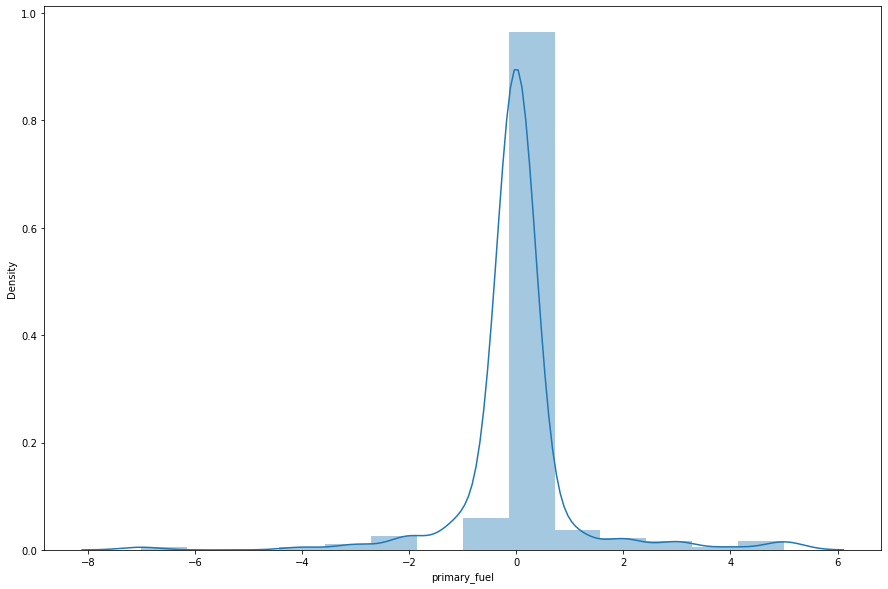

In [1727]:
plt.figure(figsize=(15,10))
sns.distplot(y_test-prediction)

In [1728]:
import pickle
filename = 'PowerClass.pkl'
pickle.dump(gcv,open(filename, 'wb'))

In [1729]:
loaded_model = pickle.load(open(filename, 'rb'))
predicted = loaded_model.score(x_test,y_test)*100
print(predicted)

82.64840182648402


<AxesSubplot:xlabel='primary_fuel', ylabel='Density'>

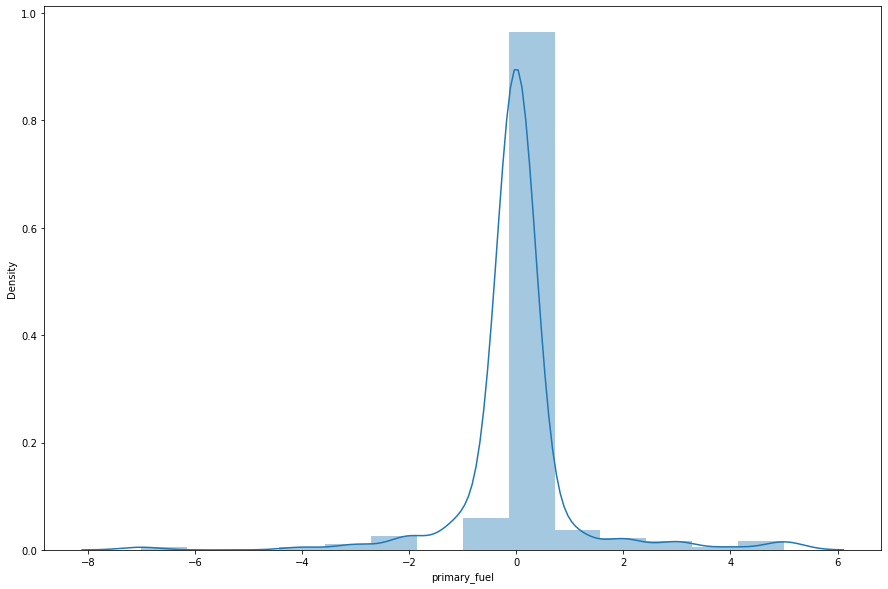

In [1730]:
plt.figure(figsize=(15,10))
sns.distplot(y_test-prediction)